In [1]:
%config IPCompleter.greedy=True

# 双有理写像の実装

次のbirational mapをSageMath上で構築する。

$\mathbb{C}[a,b,c,d,e,f,\alpha,\beta,\lambda,\tau]$はpolynomial ring over $\mathbb{C}$ in indeterminates $a,b,c,d,e,f,\alpha,\beta,\lambda,\tau$であるとし、
$$
	q_1=acdf-abd-ace-bcf-def+a^2+b^2+c^2+d^2+e^2+f^2,\\
	q_2=af-be+cd
$$
とおく。
$$
	X=\mathrm{Spec}(\mathbb{C}[a,b,c,d,e,f]/(q_1-8,q_2+4)),\\
	\mathbb{A}^4=\mathrm{Spec}\mathbb{C}[\alpha,\beta,\lambda,\tau]
$$
とおく。
$$
	A_X=a^2-abd+b^2,\\
	B_X=-a^3c+a^2bcd-ab^2c+acd^2+4ad-2bcd-8b,\\
	D_X=a^2+b^2+d^2-abd-4,\\
	u_X=\frac{2A_Xe+B_X}{aD_X},\\
	K_X=u_X{}^2-c^2+4,\\
	\lambda_X=\frac{2d(u_X{}^2-c^2)-8c}{K_X}-ab,\\
	(c_0)_X=\frac{\lambda_X-ab}{2},\\
	\Lambda_{\mathbb{A}^4}=\lambda^2-(\alpha^2-4)(\beta^2-4),\\
	(c_0)_{\mathbb{A}^4}=\frac{\lambda-\alpha\beta}{2},\\
	\theta=2\frac{(\Lambda_{\mathbb{A}^4}+16)(c_0)_{\mathbb{A}^4}+8\alpha\beta-\Lambda_{\mathbb{A}^4}(c_0)_{\mathbb{A}^4}\tau}{\Lambda_{\mathbb{A}^4}(\tau^2-1)-16},\\
	c_{\mathbb{A}^4}=(c_0)_{\mathbb{A}^4}+\theta,\\
	u_{\mathbb{A}^4}=(c_0)_{\mathbb{A}^4}+\tau\theta,\\
	K_{\mathbb{A}^4}=u_{\mathbb{A}^4}{}^2-c_{\mathbb{A}^4}{}^2+4
$$
とおく。

このとき、$X$はalgebraic $4$-fold over $k$であり、次を満たすbirational map $\Phi\colon\mathbb{A}_k^4\dashrightarrow X$が存在する。
$$
	\Phi^*(a)=\alpha,\\
	\Phi^*(b)=\beta,\\
	\Phi^*(c)=c_{\mathbb{A}^4},\\
	\Phi^*(d)=\frac{\lambda K_{\mathbb{A}^4}+\alpha\beta K_{\mathbb{A}^4}+8c_{\mathbb{A}^4}}{2(K_{\mathbb{A}^4}-4)},\\
	\Phi^*(e)=\frac{-\Phi^*(B_X)+\alpha u_{\mathbb{A}^4}\Phi^*(D_X)}{2\Phi^*(A_X)},\\
	\Phi^*(f)=\Phi^*\left(\frac{-4+be-cd}{a}\right),\\
	(\Phi^{-1})^*(\alpha)=a\\
	(\Phi^{-1})^*(\beta)=b,\\
	(\Phi^{-1})^*(\lambda)=\lambda_X,\\
	(\Phi^{-1})^*(\tau)=\frac{u_X-(c_0)_X}{c-(c_0)_X}.
$$

In [136]:
R = PolynomialRing(QQ, 'a,b,c,d,e,f,lam,tau')
a,b,c,d,e,f,lam,tau = R.gens()

In [3]:
#A_X=a^2-abd+b^2,\\
A_X = a^2 - a*b*d + b^2

#B_X=-a^3c+a^2bcd-ab^2c+acd^2+4ad-2bcd-8b,\\
B_X = - a^3*c + a^2*b*c*d - a*b^2*c + a*c*d^2 + 4*a*d - 2*b*c*d - 8*b

#D_X=a^2+b^2+d^2-abd-4,\\
D_X = a^2 + b^2 + d^2 - a*b*d - 4

#u_X=\frac{2A_Xe+B_X}{aD_X},\\
u_X = (2*A_X*e + B_X) / (a*D_X)

#K_X=u_X{}^2-c^2+4,\\
K_X = u_X^2 - c^2 + 4

#\lambda_X=\frac{2d(u_X{}^2-c^2)-8c}{K_X}-ab,\\
lam_X = (2*d*(u_X^2 - c^2) - 8*c) / K_X - a*b

#(c_0)_X=\frac{\lambda_X-ab}{2},\\
c_0_X = (lam_X - a*b) / 2

#\Lambda_{\mathbb{A}^4}=\lambda^2-(\alpha^2-4)(\beta^2-4),\\
Lam_A = lam^2 - (a^2 - 4) * (b^2 - 4)

#(c_0)_{\mathbb{A}^4}=\frac{\lambda-\alpha\beta}{2},\\
c_0_A = (lam - a*b) / 2

#\theta=2\frac{(\Lambda_{\mathbb{A}^4}+16)(c_0)_{\mathbb{A}^4}+8\alpha\beta-\Lambda_{\mathbb{A}^4}(c_0)_{\mathbb{A}^4}\tau}{\Lambda_{\mathbb{A}^4}(\tau^2-1)-16},\\
theta = 2*((Lam_A + 16)*c_0_A + 8*a*b - Lam_A*c_0_A*tau) / (Lam_A*(tau^2 - 1) - 16)

#c_{\mathbb{A}^4}=(c_0)_{\mathbb{A}^4}+\theta,\\
c_A = c_0_A + theta

#u_{\mathbb{A}^4}=(c_0)_{\mathbb{A}^4}+\tau\theta,\\
u_A = c_0_A + tau*theta

#K_{\mathbb{A}^4}=u_{\mathbb{A}^4}{}^2-c_{\mathbb{A}^4}{}^2+4
K_A = u_A^2 - c_A^2 + 4

In [4]:
def robust_simplify(expr):
    """
    多項式・有理式・数値・辞書など、あらゆる入力に対して
    係数の約分（コンテンツのくくり出し）を試みる関数。
    整数などが来てもエラーにならないように設計しています。
    """
    # 辞書なら各要素に適用
    if isinstance(expr, dict):
        return {k: robust_simplify(v) for k, v in expr.items()}

    # 分子・分母がない（単純な数値や未定義オブジェクト）場合はそのまま返す
    if not hasattr(expr, 'numerator') or not hasattr(expr, 'denominator'):
        return expr

    num = expr.numerator()
    den = expr.denominator()

    # --- ヘルパー関数: 多項式ならコンテンツ（係数の公約数）と原始多項式を分離 ---
    def get_content_and_prim(poly):
        # coefficients属性がない（単なる数値などの）場合
        if not hasattr(poly, 'coefficients'):
            return poly, 1 # コンテンツ=数値そのもの, 原始部分=1 とする
        
        coeffs = poly.coefficients()
        if not coeffs: 
            return 0, 0 # ゼロ多項式
            
        # 係数の分母のLCMをとって整数化の準備
        denom_lcm = lcm([c.denominator() for c in coeffs])
        # 整数化した係数のGCD
        int_gcd = gcd([Integer(c * denom_lcm) for c in coeffs])
        
        if int_gcd == 0: return 0, 0
        
        content = int_gcd / denom_lcm
        prim = poly / content
        return content, prim
    # ----------------------------------------------------------------

    # 分子・分母の係数をチェックする（両方とも数値なら何もしない）
    if not hasattr(num, 'coefficients') and not hasattr(den, 'coefficients'):
        return expr

    # コンテンツの抽出
    num_cont, num_prim = get_content_and_prim(num)
    den_cont, den_prim = get_content_and_prim(den)
    
    if den_cont == 0: 
        raise ValueError("Denominator is zero.")

    # 係数部分を約分
    scalar_part = num_cont / den_cont
    
    # 再構築: (係数) * (原始的な分子) / (原始的な分母)
    return scalar_part * num_prim / den_prim

$\Phi\colon\mathbb{A}^4\dashrightarrow X$ を実装する。

In [5]:
def rational_map_Phi(p):

    if isinstance(p, dict):
        a_arg, b_arg, lam_arg, tau_arg = tuple(p.values())
    else:
        a_arg, b_arg, lam_arg, tau_arg = p

    #\Phi^*(a)=\alpha,\\
    a_ret = robust_simplify(a_arg)
    
	#\Phi^*(b)=\beta,\\
    b_ret = robust_simplify(b_arg)
    
    #\Phi^*(c)=c_{\mathbb{A}^4},\\
    c_ret = robust_simplify(c_A.substitute({a:a_arg, b:b_arg, lam:lam_arg, tau:tau_arg}))

    #\Phi^*(d)=\frac{\lambda K_{\mathbb{A}^4}+\alpha\beta K_{\mathbb{A}^4}+8c_{\mathbb{A}^4}}{2(K_{\mathbb{A}^4}-4)},\\
    K = K_A.substitute({a:a_arg, b:b_arg, lam:lam_arg, tau:tau_arg})
    d_ret = robust_simplify((lam_arg*K + a_arg*b_arg*K + 8*c_ret) / (2*(K - 4)))

    #\Phi^*(e)=\frac{-\Phi^*(B_X)+\alpha u_{\Affine^4}\Phi^*(D_X)}{2\Phi^*(A_X)},\\
    A = A_X.substitute({a:a_ret, b:b_ret, c:c_ret, d:d_ret})
    B = B_X.substitute({a:a_ret, b:b_ret, c:c_ret, d:d_ret})
    D = D_X.substitute({a:a_ret, b:b_ret, c:c_ret, d:d_ret})
    u = u_A.substitute({a:a_arg, b:b_arg, lam:lam_arg, tau:tau_arg})
    e_ret = robust_simplify((-B + a_ret*u*D) / (2*A))

    #\Phi^*(f)=\Phi^*\left(\frac{-4+be-cd}{a}\right),\\
    f_ret = robust_simplify((-4 + b_ret*e_ret - c_ret*d_ret) / a_ret)

    return {'a':a_ret, 'b':b_ret, 'c':c_ret, 'd':d_ret, 'e':e_ret, 'f':f_ret}

$\Phi^{-1}\colon X\dashrightarrow\mathbb{A}^4$ を実装する。

In [6]:
def rational_map_Phi_inverse(p):

    if isinstance(p, dict):
        a_arg, b_arg, c_arg, d_arg, e_arg, f_arg = tuple(p.values())
    else:
        a_arg, b_arg, c_arg, d_arg, e_arg, f_arg = p

    #(\Phi^{-1})^*(\alpha)=a\\
    a_ret = robust_simplify(a_arg)
    
	#(\Phi^{-1})^*(\beta)=b,\\
    b_ret = robust_simplify(b_arg)
    
	#(\Phi^{-1})^*(\lambda)=\lambda_X,\\
    lam_ret = robust_simplify(lam_X.substitute({a:a_arg, b:b_arg, c:c_arg, d:d_arg, e:e_arg, f:f_arg}))

	#(\Phi^{-1})^*(\tau)=\frac{u_X-(c_0)_X}{c-(c_0)_X}.
    u = u_X.substitute({a:a_arg, b:b_arg, c:c_arg, d:d_arg, e:e_arg, f:f_arg})
    c_0 = c_0_X.substitute({a:a_arg, b:b_arg, c:c_arg, d:d_arg, e:e_arg, f:f_arg})
    tau_ret = robust_simplify((u - c_0) / (c_arg - c_0))
    
    return {'a':a_ret, 'b':b_ret, 'lam':lam_ret, 'tau':tau_ret}

引数の点が $X$ 上に存在するかを確認するメソッドで、$\Phi$ の像が $X$ に入ることを確認

In [7]:
def is_on_X(p):

    if isinstance(p, dict):
        a,b,c,d,e,f = tuple(p.values())
    else:
        a,b,c,d,e,f = p
    
    if a*c*d*f-a*b*d-a*c*e-b*c*f-d*e*f+a^2+b^2+c^2+d^2+e^2+f^2 != 8:
        return False
    if a*f-b*e+c*d != -4:
        return False
    return True

In [8]:
p = (a,b,lam,tau)
Phi = rational_map_Phi(p)

In [9]:
#最初のいくつかの成分
(Phi['a'],Phi['b'],Phi['c'],Phi['d'])

(a,
 b,
 (1/2*a^3*b^3*tau^2 - a^3*b^3*tau - 1/2*a^2*b^2*lam*tau^2 + 1/2*a^3*b^3 + a^2*b^2*lam*tau - 2*a^3*b*tau^2 - 2*a*b^3*tau^2 - 1/2*a*b*lam^2*tau^2 - 1/2*a^2*b^2*lam + 4*a^3*b*tau + 4*a*b^3*tau + a*b*lam^2*tau + 2*a^2*lam*tau^2 + 2*b^2*lam*tau^2 + 1/2*lam^3*tau^2 - 2*a^3*b - 2*a*b^3 - 1/2*a*b*lam^2 - 4*a^2*lam*tau - 4*b^2*lam*tau - lam^3*tau + 8*a*b*tau^2 + 2*a^2*lam + 2*b^2*lam + 1/2*lam^3 - 16*a*b*tau - 8*lam*tau^2 + 16*a*b + 16*lam*tau)/(-a^2*b^2*tau^2 + a^2*b^2 + 4*a^2*tau^2 + 4*b^2*tau^2 + lam^2*tau^2 - 4*a^2 - 4*b^2 - lam^2 - 16*tau^2),
 (-1/4*a^4*b^4*tau^2 + 1/2*a^4*b^4*tau - 1/4*a^4*b^4 + 2*a^4*b^2*tau^2 + 2*a^2*b^4*tau^2 + 1/2*a^2*b^2*lam^2*tau^2 - 2*a^4*b^2*tau - 2*a^2*b^4*tau - a^2*b^2*lam^2*tau + 1/2*a^2*b^2*lam^2 - 4*a^4*tau^2 - 16*a^2*b^2*tau^2 - 4*b^4*tau^2 - 2*a^2*lam^2*tau^2 - 2*b^2*lam^2*tau^2 - 1/4*lam^4*tau^2 + 8*a^2*b^2*tau + 2*a^2*lam^2*tau + 2*b^2*lam^2*tau + 1/2*lam^4*tau + 4*a^4 + 4*a^2*b^2 + 4*b^4 - 1/4*lam^4 + 32*a^2*tau^2 + 32*b^2*tau^2 + 8*lam^2*tau^2 -

In [10]:
is_on_X(Phi)

True

$\rightarrow$ $\Phi$ の像は $X$ 上にある。

先ほどの$\Phi(a,b,\lambda,\tau)$ に $\Phi^{-1}$ を施して $\Phi^{-1}\circ\Phi = \mathrm{id}$ の確認

In [11]:
Phi_inv_circ_Phi = rational_map_Phi_inverse(Phi)
Phi_inv_circ_Phi

{'a': a, 'b': b, 'lam': lam, 'tau': tau}

$\Phi^{-1}$ の計算と $\Phi\circ\Phi^{-1} = \mathrm{id}$ の確認。
こちらはsymbolicな計算は重くてできないため、いくつかの例の数値計算で確認する。

In [16]:
p = (a,b,c,d,e,f)
Phi_inv = rational_map_Phi_inverse(p)

In [17]:
#Phi_inv['tau']は大きいので省略
Phi_inv['lam']

(-a^4*b^2*c^2*d^3 + a^4*b^3*c*d^2*e - a^5*b^3*d^2 + a^5*b*c^2*d^2 + 2*a^3*b^3*c^2*d^2 + 2*a^3*b*c^2*d^4 - 2*a^5*b^2*c*d*e - 2*a^3*b^4*c*d*e - a^3*b^2*c*d^3*e - a^3*b^3*d^2*e^2 + 2*a^6*b^2*d + 2*a^4*b^4*d + a^4*b^2*c^2*d - a^2*b^4*c^2*d - 4*a^4*b^2*c*d^2 + 2*a^4*b^2*d^3 - 2*a^4*c^2*d^3 - 3*a^2*b^2*c^2*d^3 + a^6*b*c*e + 2*a^4*b^3*c*e + a^2*b^5*c*e + 3*a^4*b*c*d^2*e + a^2*b^3*c*d^2*e - 2*a^2*b*c*d^4*e + 2*a^4*b^2*d*e^2 + 2*a^2*b^4*d*e^2 + 2*a^2*b^2*d^3*e^2 - a^7*b - 2*a^5*b^3 - a^3*b^5 - 2*a^5*b*c^2 - 2*a^3*b^3*c^2 + 6*a^5*b*c*d + 10*a^3*b^3*c*d - 2*a^5*b*d^2 - 2*a^3*b^3*d^2 - 4*a^3*b*c^2*d^2 + a*b^3*c^2*d^2 + 6*a^3*b*c*d^3 - a^3*b*d^4 - 2*a*b*c^2*d^4 - 2*a^5*c*d*e - 2*a^3*b^2*c*d*e + 4*a^3*b^2*d^2*e + 2*a^3*c*d^3*e + 6*a*b^2*c*d^3*e - a^5*b*e^2 - 2*a^3*b^3*e^2 - a*b^5*e^2 - 4*a^3*b*d^2*e^2 - 4*a*b^3*d^2*e^2 - 2*a^6*c - 8*a^4*b^2*c - 6*a^2*b^4*c - 8*a^4*b^2*d + 4*a^4*c^2*d + 4*a^2*b^2*c^2*d - 8*a^4*c*d^2 - 8*a^2*b^2*c*d^2 + 4*a^2*c^2*d^3 + 2*b^2*c^2*d^3 + 2*a^2*c*d^4 - 4*a^4*b*d*e - 12*a^

In [19]:
#例1
is_on_X([5, 14, 40, 5, 16, 4])

True

In [20]:
Phi_inv_num = rational_map_Phi_inverse([5, 14, 40, 5, 16, 4])
Phi_inv_num

{'a': 5, 'b': 14, 'lam': -276/5, 'tau': 118/513}

In [21]:
Phi_circ_Phi_inv = rational_map_Phi(Phi_inv_num)
Phi_circ_Phi_inv

{'a': 5, 'b': 14, 'c': 40, 'd': 5, 'e': 16, 'f': 4}

In [22]:
#例2 ランダムに入力データを作成

def generate_random_point_on_X_direct(search_range=10):
    """
    Phiを経由せず、方程式を直接解くことで X 上の有理点をランダム生成する。
    """
    # 試行回数カウンタ（デバッグ用）
    attempts = 0
    
    while True:
        attempts += 1
        
        # 1. 4つの変数をランダムに決める (a,b,c,d)
        # 分母があっても良いが、まずは整数で探索したほうがヒットしやすい
        a_val = QQ(randint(-search_range, search_range))
        b_val = QQ(randint(-search_range, search_range))
        c_val = QQ(randint(-search_range, search_range))
        d_val = QQ(randint(-search_range, search_range))
        
        # e を計算するために b は 0 であってはならない
        # (もし b=0 なら a,f,c,d の関係式になるので別の処理が必要だが、簡単のためスキップ)
        if b_val == 0:
            continue
            
        # 2. q2 = af - be + cd = -4 から e を f の式として表す
        # e = (af + cd + 4) / b
        # 係数を計算: e = C1 * f + C0
        C1 = a_val / b_val
        C0 = (c_val * d_val + 4) / b_val
        
        # 3. q1 = 8 に代入して f の二次方程式を作る
        # q1 = acdf - abd - ace - bcf - def + (a^2...f^2) - 8 = 0
        
        # 各項を f の多項式として整理
        # 項: acdf -> a*c*d*f
        # 項: -abd ->定数
        # 項: -ace -> -a*c*(C1*f + C0)
        # 項: -bcf -> -b*c*f
        # 項: -def -> -d*(C1*f + C0)*f = -d*C1*f^2 - d*C0*f
        # 項: e^2  -> (C1*f + C0)^2 = C1^2*f^2 + 2*C1*C0*f + C0^2
        # 項: f^2  -> f^2
        
        # f^2 の係数 (Coeff A)
        # 由来: -def, e^2, f^2
        coeff_A = -d_val * C1 + C1**2 + 1
        
        # f^1 の係数 (Coeff B)
        # 由来: acdf, -ace, -bcf, -def, e^2
        coeff_B = (a_val * c_val * d_val) \
                  - (a_val * c_val * C1) \
                  - (b_val * c_val) \
                  - (d_val * C0) \
                  + (2 * C1 * C0)
        
        # 定数項 (Coeff C)
        # 由来: -abd, -ace, sum(sq) - 8, e^2
        sum_sq_fixed = a_val^2 + b_val^2 + c_val^2 + d_val^2
        coeff_C = - (a_val * b_val * d_val) \
                  - (a_val * c_val * C0) \
                  + sum_sq_fixed \
                  + C0^2 \
                  - 8
        
        # 二次方程式 A*f^2 + B*f + C = 0
        if coeff_A == 0:
            # 一次方程式になった場合 (珍しい)
            if coeff_B != 0:
                f_val = -coeff_C / coeff_B
                # 解が見つかった
                e_val = C1 * f_val + C0
                return {'a': a_val, 'b': b_val, 'c': c_val, 'd': d_val, 'e': e_val, 'f': f_val}
            else:
                continue
                
        # 4. 判別式 D = B^2 - 4AC が平方数かチェック
        D = coeff_B^2 - 4 * coeff_A * coeff_C
        
        if D >= 0:
            sqrt_D = sqrt(D)
            if sqrt_D in QQ: # 有理数の範囲でルートが開けるか
                # 解が見つかった (2つあるが、どちらでも良いので片方採用)
                f_val = (-coeff_B + sqrt_D) / (2 * coeff_A)
                e_val = C1 * f_val + C0
                
                # 念のため検算
                # p = {'a': a_val, 'b': b_val, 'c': c_val, 'd': d_val, 'e': e_val, 'f': f_val}
                # print(f"Found after {attempts} attempts.")
                return {'a': a_val, 'b': b_val, 'c': c_val, 'd': d_val, 'e': e_val, 'f': f_val}

# 実行テスト
print("Generating random point on X directly...")
p_random = generate_random_point_on_X_direct(search_range=5)
print("Result:", p_random)

# 念のため X に乗っているかチェック
print("Is on X?", is_on_X(p_random))

# これを Phi_inv で A4 に送ってみる（A4上のどこに対応するか？）
try:
    p_A4 = rational_map_Phi_inverse(p_random)
    print("Mapped to A4:", p_A4)
except Exception as errrr:
    print("Mapping to A4 failed (Singularity):", err)


Generating random point on X directly...
Result: {'a': 1, 'b': 2, 'c': -2, 'd': -3, 'e': 4, 'f': -2}
Is on X? True
Mapped to A4: {'a': 1, 'b': 2, 'lam': -8/5, 'tau': -43/2}


In [23]:
Phi_circ_Phi_inv = rational_map_Phi(rational_map_Phi_inverse(p_random))
Phi_circ_Phi_inv == p_random

True

# $B_4$ の作用の $\mathbb{A}^4$ への引き戻しの実装

In [24]:
# ================================================================
# 1. X上の B4 作用の定義
# ================================================================
def sigma1_on_X(p):
    # p is a dict {'a':..., 'f':...}
    # a -> a, b -> ab-d, c -> ac-e, d -> b, e -> c, f -> f
    return {
        'a': p['a'],
        'b': p['a']*p['b'] - p['d'],
        'c': p['a']*p['c'] - p['e'],
        'd': p['b'],
        'e': p['c'],
        'f': p['f']
    }

def sigma2_on_X(p):
    # a -> ad-b, b -> a, c -> c, d -> d, e -> de-f, f -> e
    return {
        'a': p['a']*p['d'] - p['b'],
        'b': p['a'],
        'c': p['c'],
        'd': p['d'],
        'e': p['d']*p['e'] - p['f'],
        'f': p['e']
    }

def sigma3_on_X(p):
    # a -> a, b -> fb-c, c -> b, d -> fd-e, e -> d, f -> f
    return {
        'a': p['a'],
        'b': p['f']*p['b'] - p['c'],
        'c': p['b'],
        'd': p['f']*p['d'] - p['e'],
        'e': p['d'],
        'f': p['f']
    }

# ================================================================
# X上の逆作用 (Inverse Actions) の定義
# ================================================================
# 各 sigma の定義式を逆算して実装します

def sigma1_inv_on_X(p):
    # Forward: a->a, b->ab-d, c->ac-e, d->b, e->c, f->f
    # Inverse: a=A, b=D, c=E, d=ab-B=AD-B, e=ac-C=AE-C, f=F
    return {
        'a': p['a'],
        'b': p['d'],
        'c': p['e'],
        'd': p['a']*p['d'] - p['b'],
        'e': p['a']*p['e'] - p['c'],
        'f': p['f']
    }

def sigma2_inv_on_X(p):
    # Forward: a->ad-b, b->a, c->c, d->d, e->de-f, f->e
    # Inverse: a=B, b=ad-A=DB-A, c=C, d=D, e=F, f=de-E=DF-E
    return {
        'a': p['b'],
        'b': p['d']*p['b'] - p['a'],
        'c': p['c'],
        'd': p['d'],
        'e': p['f'],
        'f': p['d']*p['f'] - p['e']
    }

def sigma3_inv_on_X(p):
    # Forward: a->a, b->fb-c, c->b, d->fd-e, e->d, f->f
    # Inverse: a=A, b=C, c=fb-B=FC-B, d=E, e=fd-D=FE-D, f=F
    return {
        'a': p['a'],
        'b': p['c'],
        'c': p['f']*p['c'] - p['b'],
        'd': p['e'],
        'e': p['f']*p['e'] - p['d'],
        'f': p['f']
    }


# ================================================================
# 2. A4 への引き戻し関数
# sigma_A4 = Phi_inv . sigma_X . Phi
# ================================================================
def pullback_action(sigma_func, params):
    # params: {'a': ..., 'b': ..., 'lam': ..., 'tau': ...} (symbolic or numeric)
    
    # 1. Map A4 -> X
    p_on_X = rational_map_Phi(params)
    
    # 2. Apply sigma on X
    p_transformed = sigma_func(p_on_X)
    p_transformed = robust_simplify(p_transformed)
    
    # 3. Map X -> A4 (Inverse)
    p_back = rational_map_Phi_inverse(p_transformed)
    
    return p_back


In [25]:
# ================================================================
# 3. 実行と確認 (数値計算またはSymbolic)
# ================================================================

# Symbolic変数の準備 (もし定義されていなければ)
# R = PolynomialRing(QQ, 'a,b,c,d,e,f,lam,tau')
# a,b,c,d,e,f,lam,tau = R.gens()
# 始点 (Symbolic)
sym_params = {'a': a, 'b': b, 'lam': lam, 'tau': tau}

print("Calculating Pullback of Sigma1...")
# 巨大になる可能性があるため、まずは factor() で整理しながら表示することをお勧めします
# 時間がかかりすぎる場合は、a, b, lam, tau に具体的な数値を代入して挙動を確認してください。

# 例: Sigma1 の引き戻し計算
sigma1_A4_res = pullback_action(sigma1_on_X, sym_params)

print("\n--- Result for Sigma 1 on A4 ---")
# 結果の式が長すぎる場合があるため、各成分ごとに表示
print("alpha' =", sigma1_A4_res['a']) # alpha' = a のはず
print("beta'  =", sigma1_A4_res['b']) # beta' = ab - d_Phi(...) のような形

# もし計算が重すぎる場合は、数値例で確認
print("\n--- Numerical Verification for Sigma 1 ---")
num_params = {'a': 1/2, 'b': 4/3, 'lam': 2, 'tau': 2/5}
sigma1_num = pullback_action(sigma1_on_X, num_params)
print(sigma1_num)

Calculating Pullback of Sigma1...

--- Result for Sigma 1 on A4 ---
alpha' = a
beta'  = (1/4*a^4*b^4*tau^2 + 1/2*a^4*b^4*tau - 3/4*a^4*b^4 - a^3*b^3*lam*tau - 2*a^4*b^2*tau^2 - 2*a^2*b^4*tau^2 - 1/2*a^2*b^2*lam^2*tau^2 + a^3*b^3*lam - 2*a^4*b^2*tau - 2*a^2*b^4*tau + 4*a^4*b^2 + 4*a^2*b^4 + 1/2*a^2*b^2*lam^2 + 4*a^3*b*lam*tau + 4*a*b^3*lam*tau + a*b*lam^3*tau + 4*a^4*tau^2 + 16*a^2*b^2*tau^2 + 4*b^4*tau^2 + 2*a^2*lam^2*tau^2 + 2*b^2*lam^2*tau^2 + 1/4*lam^4*tau^2 - 4*a^3*b*lam - 4*a*b^3*lam - a*b*lam^3 + 8*a^2*b^2*tau - 2*a^2*lam^2*tau - 2*b^2*lam^2*tau - 1/2*lam^4*tau - 4*a^4 - 20*a^2*b^2 - 4*b^4 + 1/4*lam^4 - 16*a*b*lam*tau - 32*a^2*tau^2 - 32*b^2*tau^2 - 8*lam^2*tau^2 + 8*a*b*lam + 8*lam^2*tau + 16*a^2 + 16*b^2 + 4*lam^2 + 64*tau^2)/(a^3*b^3*tau - a^3*b^3 - a^2*b^2*lam*tau + a^2*b^2*lam - 4*a^3*b*tau - 4*a*b^3*tau - a*b*lam^2*tau + 4*a^3*b + 4*a*b^3 + a*b*lam^2 + 4*a^2*lam*tau + 4*b^2*lam*tau + lam^3*tau - 4*a^2*lam - 4*b^2*lam - lam^3 + 16*a*b*tau - 16*a*b - 16*lam*tau)

--- Numerica

In [26]:
sigma1_A4_res['a']

a

In [27]:
sigma1_A4_res['b']

(1/4*a^4*b^4*tau^2 + 1/2*a^4*b^4*tau - 3/4*a^4*b^4 - a^3*b^3*lam*tau - 2*a^4*b^2*tau^2 - 2*a^2*b^4*tau^2 - 1/2*a^2*b^2*lam^2*tau^2 + a^3*b^3*lam - 2*a^4*b^2*tau - 2*a^2*b^4*tau + 4*a^4*b^2 + 4*a^2*b^4 + 1/2*a^2*b^2*lam^2 + 4*a^3*b*lam*tau + 4*a*b^3*lam*tau + a*b*lam^3*tau + 4*a^4*tau^2 + 16*a^2*b^2*tau^2 + 4*b^4*tau^2 + 2*a^2*lam^2*tau^2 + 2*b^2*lam^2*tau^2 + 1/4*lam^4*tau^2 - 4*a^3*b*lam - 4*a*b^3*lam - a*b*lam^3 + 8*a^2*b^2*tau - 2*a^2*lam^2*tau - 2*b^2*lam^2*tau - 1/2*lam^4*tau - 4*a^4 - 20*a^2*b^2 - 4*b^4 + 1/4*lam^4 - 16*a*b*lam*tau - 32*a^2*tau^2 - 32*b^2*tau^2 - 8*lam^2*tau^2 + 8*a*b*lam + 8*lam^2*tau + 16*a^2 + 16*b^2 + 4*lam^2 + 64*tau^2)/(a^3*b^3*tau - a^3*b^3 - a^2*b^2*lam*tau + a^2*b^2*lam - 4*a^3*b*tau - 4*a*b^3*tau - a*b*lam^2*tau + 4*a^3*b + 4*a*b^3 + a*b*lam^2 + 4*a^2*lam*tau + 4*b^2*lam*tau + lam^3*tau - 4*a^2*lam - 4*b^2*lam - lam^3 + 16*a*b*tau - 16*a*b - 16*lam*tau)

In [28]:
sigma1_A4_res['lam']

(-1/4*a^8*b^7*tau^3 - 1/4*a^8*b^7*tau^2 + 1/4*a^7*b^6*lam*tau^3 + 5/4*a^8*b^7*tau + 5/4*a^7*b^6*lam*tau^2 + 3*a^8*b^5*tau^3 + 4*a^6*b^7*tau^3 + 3/4*a^6*b^5*lam^2*tau^3 - 3/4*a^8*b^7 - 13/4*a^7*b^6*lam*tau + a^8*b^5*tau^2 + 2*a^6*b^7*tau^2 - 5/4*a^6*b^5*lam^2*tau^2 - 3*a^7*b^4*lam*tau^3 - 3*a^5*b^6*lam*tau^3 - 3/4*a^5*b^4*lam^3*tau^3 + 7/4*a^7*b^6*lam - 11*a^8*b^5*tau - 16*a^6*b^7*tau + 1/4*a^6*b^5*lam^2*tau - 9*a^7*b^4*lam*tau^2 - 13*a^5*b^6*lam*tau^2 - 7/4*a^5*b^4*lam^3*tau^2 - 12*a^8*b^3*tau^3 - 48*a^6*b^5*tau^3 - 24*a^4*b^7*tau^3 - 6*a^6*b^3*lam^2*tau^3 - 9*a^4*b^5*lam^2*tau^3 - 3/4*a^4*b^3*lam^4*tau^3 + 7*a^8*b^5 + 10*a^6*b^7 + 1/4*a^6*b^5*lam^2 + 27*a^7*b^4*lam*tau + 35*a^5*b^6*lam*tau + 23/4*a^5*b^4*lam^3*tau + 4*a^8*b^3*tau^2 - 4*a^6*b^5*tau^2 + 14*a^6*b^3*lam^2*tau^2 + 15*a^4*b^5*lam^2*tau^2 + 13/4*a^4*b^3*lam^4*tau^2 + 12*a^7*b^2*lam*tau^3 + 36*a^5*b^4*lam*tau^3 + 12*a^3*b^6*lam*tau^3 + 6*a^5*b^2*lam^3*tau^3 + 6*a^3*b^4*lam^3*tau^3 + 3/4*a^3*b^2*lam^5*tau^3 - 15*a^7*b^4*lam - 

In [29]:
sigma1_A4_res['tau']

(-3*a^12*b^12*tau^6 + 2*a^12*b^12*tau^5 + 4*a^11*b^11*lam*tau^6 + 19*a^12*b^12*tau^4 + 8*a^11*b^11*lam*tau^5 + 60*a^12*b^10*tau^6 + 64*a^10*b^12*tau^6 + 14*a^10*b^10*lam^2*tau^6 - 36*a^12*b^12*tau^3 - 68*a^11*b^11*lam*tau^4 - 48*a^12*b^10*tau^5 - 64*a^10*b^12*tau^5 - 36*a^10*b^10*lam^2*tau^5 - 80*a^11*b^9*lam*tau^6 - 80*a^9*b^11*lam*tau^6 - 20*a^9*b^9*lam^3*tau^6 + 19*a^12*b^12*tau^2 + 112*a^11*b^11*lam*tau^3 - 308*a^12*b^10*tau^4 - 320*a^10*b^12*tau^4 + 18*a^10*b^10*lam^2*tau^4 - 96*a^11*b^9*lam*tau^5 - 96*a^9*b^11*lam*tau^5 - 8*a^9*b^9*lam^3*tau^5 - 480*a^12*b^8*tau^6 - 1280*a^10*b^10*tau^6 - 560*a^8*b^12*tau^6 - 220*a^10*b^8*lam^2*tau^6 - 240*a^8*b^10*lam^2*tau^6 - 25*a^8*b^8*lam^4*tau^6 + 2*a^12*b^12*tau - 68*a^11*b^11*lam*tau^2 + 576*a^12*b^10*tau^3 + 640*a^10*b^12*tau^3 + 8*a^10*b^10*lam^2*tau^3 + 1072*a^11*b^9*lam*tau^4 + 1104*a^9*b^11*lam*tau^4 + 212*a^9*b^9*lam^3*tau^4 + 448*a^12*b^8*tau^5 + 1344*a^10*b^10*tau^5 + 736*a^8*b^12*tau^5 + 592*a^10*b^8*lam^2*tau^5 + 672*a^8*b^10*la

In [31]:
def print_factored_coeffs(expr):
    """
    多項式または有理関数の係数を因数分解して表示する関数
    """
    # 分数の場合、分子と分母に分ける
    if hasattr(expr, 'numerator') and hasattr(expr, 'denominator'):
        # 分母が1の場合は多項式として扱う
        if expr.denominator() == 1:
            expr = expr.numerator()
        else:
            print("--- Numerator ---")
            print_factored_coeffs(expr.numerator())
            print("\n--- Denominator ---")
            print_factored_coeffs(expr.denominator())
            return

    # 多項式の各項を表示
    # SageMathの多項式オブジェクトを想定
    try:
        terms_str = []
        # 係数と単項式のペアを取得して処理
        # (定数項のみの場合などのためにlist化して処理)
        coeffs = expr.coefficients()
        monos = expr.monomials()
        
        for coeff, mono in zip(coeffs, monos):
            # 係数を因数分解
            c_fact = factor(coeff)
            
            # 単項式部分の表示（1の場合は表示しないなどの調整）
            mono_str = str(mono)
            if mono_str == '1':
                terms_str.append(f"({c_fact})")
            else:
                terms_str.append(f"({c_fact})*{mono_str}")
        
        # 結合して表示
        print(" + ".join(terms_str))
        
    except Exception as e:
        # 多項式でない場合やエラー時はそのまま因数分解を試みる
        print(f"Cannot iterate terms ({e}). Showing factored expr:")
        print(expr.factor())

# 使用例
print_factored_coeffs(sigma1_A4_res['tau'])

--- Numerator ---
(-1 * 3)*a^12*b^12*tau^6 + (2)*a^12*b^12*tau^5 + (2^2)*a^11*b^11*lam*tau^6 + (19)*a^12*b^12*tau^4 + (2^3)*a^11*b^11*lam*tau^5 + (2^2 * 3 * 5)*a^12*b^10*tau^6 + (2^6)*a^10*b^12*tau^6 + (2 * 7)*a^10*b^10*lam^2*tau^6 + (-1 * 2^2 * 3^2)*a^12*b^12*tau^3 + (-1 * 2^2 * 17)*a^11*b^11*lam*tau^4 + (-1 * 2^4 * 3)*a^12*b^10*tau^5 + (-1 * 2^6)*a^10*b^12*tau^5 + (-1 * 2^2 * 3^2)*a^10*b^10*lam^2*tau^5 + (-1 * 2^4 * 5)*a^11*b^9*lam*tau^6 + (-1 * 2^4 * 5)*a^9*b^11*lam*tau^6 + (-1 * 2^2 * 5)*a^9*b^9*lam^3*tau^6 + (19)*a^12*b^12*tau^2 + (2^4 * 7)*a^11*b^11*lam*tau^3 + (-1 * 2^2 * 7 * 11)*a^12*b^10*tau^4 + (-1 * 2^6 * 5)*a^10*b^12*tau^4 + (2 * 3^2)*a^10*b^10*lam^2*tau^4 + (-1 * 2^5 * 3)*a^11*b^9*lam*tau^5 + (-1 * 2^5 * 3)*a^9*b^11*lam*tau^5 + (-1 * 2^3)*a^9*b^9*lam^3*tau^5 + (-1 * 2^5 * 3 * 5)*a^12*b^8*tau^6 + (-1 * 2^8 * 5)*a^10*b^10*tau^6 + (-1 * 2^4 * 5 * 7)*a^8*b^12*tau^6 + (-1 * 2^2 * 5 * 11)*a^10*b^8*lam^2*tau^6 + (-1 * 2^4 * 3 * 5)*a^8*b^10*lam^2*tau^6 + (-1 * 5^2)*a^8*b^8*lam^4*t

In [32]:
sigma2_A4_res = pullback_action(sigma2_on_X, sym_params)

In [33]:
sigma2_A4_res['a']

(-1/4*a^5*b^4*tau^2 + 1/2*a^5*b^4*tau - 1/4*a^5*b^4 + 2*a^5*b^2*tau^2 + 2*a^3*b^4*tau^2 + 1/2*a^3*b^2*lam^2*tau^2 - 2*a^5*b^2*tau - 3*a^3*b^4*tau - a^3*b^2*lam^2*tau + a^3*b^4 + 1/2*a^3*b^2*lam^2 + a^2*b^3*lam*tau - 4*a^5*tau^2 - 16*a^3*b^2*tau^2 - 4*a*b^4*tau^2 - 2*a^3*lam^2*tau^2 - 2*a*b^2*lam^2*tau^2 - 1/4*a*lam^4*tau^2 - a^2*b^3*lam + 12*a^3*b^2*tau + 4*a*b^4*tau + 2*a^3*lam^2*tau + 3*a*b^2*lam^2*tau + 1/2*a*lam^4*tau + 4*a^5 - a*b^2*lam^2 - 1/4*a*lam^4 - 4*a^2*b*lam*tau - 4*b^3*lam*tau - b*lam^3*tau + 32*a^3*tau^2 + 32*a*b^2*tau^2 + 8*a*lam^2*tau^2 - 4*a^2*b*lam + 4*b^3*lam + b*lam^3 - 16*a*b^2*tau - 8*a*lam^2*tau - 16*a^3 - 4*a*lam^2 + 16*b*lam*tau - 64*a*tau^2)/(a^3*b^3*tau - a^3*b^3 - a^2*b^2*lam*tau + a^2*b^2*lam - 4*a^3*b*tau - 4*a*b^3*tau - a*b*lam^2*tau + 4*a^3*b + 4*a*b^3 + a*b*lam^2 + 4*a^2*lam*tau + 4*b^2*lam*tau + lam^3*tau - 4*a^2*lam - 4*b^2*lam - lam^3 + 16*a*b*tau - 16*a*b - 16*lam*tau)

In [34]:
sigma2_A4_res['b']

a

In [35]:
sigma2_A4_res['lam']

(1/4*a^6*b^4*tau^2 - 1/2*a^6*b^4*tau + 1/4*a^6*b^4 - 2*a^6*b^2*tau^2 - 2*a^4*b^4*tau^2 - 1/2*a^4*b^2*lam^2*tau^2 + 2*a^6*b^2*tau + 4*a^4*b^4*tau + a^4*b^2*lam^2*tau - 2*a^4*b^4 - 1/2*a^4*b^2*lam^2 - a^3*b^3*lam*tau + 4*a^6*tau^2 + 16*a^4*b^2*tau^2 + 4*a^2*b^4*tau^2 + 2*a^4*lam^2*tau^2 + 2*a^2*b^2*lam^2*tau^2 + 1/4*a^2*lam^4*tau^2 + a^3*b^3*lam - 16*a^4*b^2*tau - 8*a^2*b^4*tau - 2*a^4*lam^2*tau - 5*a^2*b^2*lam^2*tau - 1/2*a^2*lam^4*tau - 4*a^6 + 4*a^4*b^2 + 4*a^2*b^4 + 3*a^2*b^2*lam^2 + 1/4*a^2*lam^4 + 4*a^3*b*lam*tau + 4*a*b^3*lam*tau + a*b*lam^3*tau - 32*a^4*tau^2 - 32*a^2*b^2*tau^2 - 8*a^2*lam^2*tau^2 + 4*a^3*b*lam - 4*a*b^3*lam - a*b*lam^3 + 32*a^2*b^2*tau + 12*a^2*lam^2*tau + 4*b^2*lam^2*tau + lam^4*tau + 16*a^4 - 16*a^2*b^2 - 4*b^2*lam^2 - lam^4 - 16*a*b*lam*tau + 64*a^2*tau^2 - 16*a*b*lam - 16*lam^2*tau)/(a^3*b^3*tau - a^3*b^3 - a^2*b^2*lam*tau + a^2*b^2*lam - 4*a^3*b*tau - 4*a*b^3*tau - a*b*lam^2*tau + 4*a^3*b + 4*a*b^3 + a*b*lam^2 + 4*a^2*lam*tau + 4*b^2*lam*tau + lam^3*tau - 4

In [36]:
sigma2_A4_res['tau']

(-a^8*b^6*tau^4 + 2*a^8*b^6*tau^3 + 12*a^8*b^4*tau^4 + 12*a^6*b^6*tau^4 + 3*a^6*b^4*lam^2*tau^4 - 2*a^8*b^6*tau - 16*a^8*b^4*tau^3 - 20*a^6*b^6*tau^3 - 6*a^6*b^4*lam^2*tau^3 + a^8*b^6 - 8*a^8*b^4*tau^2 - 8*a^6*b^6*tau^2 - 48*a^8*b^2*tau^4 - 144*a^6*b^4*tau^4 - 48*a^4*b^6*tau^4 - 24*a^6*b^2*lam^2*tau^4 - 24*a^4*b^4*lam^2*tau^4 - 3*a^4*b^2*lam^4*tau^4 + 16*a^8*b^4*tau + 28*a^6*b^6*tau + 6*a^6*b^4*lam^2*tau + 8*a^5*b^5*lam*tau^2 + 32*a^8*b^2*tau^3 + 160*a^6*b^4*tau^3 + 64*a^4*b^6*tau^3 + 32*a^6*b^2*lam^2*tau^3 + 44*a^4*b^4*lam^2*tau^3 + 6*a^4*b^2*lam^4*tau^3 - 4*a^8*b^4 - 12*a^6*b^6 - 3*a^6*b^4*lam^2 - 16*a^5*b^5*lam*tau + 64*a^8*b^2*tau^2 + 128*a^6*b^4*tau^2 + 64*a^4*b^6*tau^2 + 16*a^6*b^2*lam^2*tau^2 + 8*a^4*b^4*lam^2*tau^2 + 64*a^8*tau^4 + 576*a^6*b^2*tau^4 + 576*a^4*b^4*tau^4 + 64*a^2*b^6*tau^4 + 48*a^6*lam^2*tau^4 + 192*a^4*b^2*lam^2*tau^4 + 48*a^2*b^4*lam^2*tau^4 + 12*a^4*lam^4*tau^4 + 12*a^2*b^2*lam^4*tau^4 + a^2*lam^6*tau^4 + 8*a^5*b^5*lam - 32*a^8*b^2*tau - 192*a^6*b^4*tau - 128*

In [37]:
#重すぎてkernelが落ちるのでsigma3はあきらめる。
sigma3_A4_res = pullback_action(sigma3_on_X, sym_params)

In [38]:
sigma3_A4_res['a']

a

In [39]:
sigma3_A4_res['b']

(-2*a^6*b^9*tau^4 + 2*a^8*b^7*tau^3 - 6*a^8*b^7*tau^2 + 4*a^6*b^9*tau^2 - 6*a^7*b^6*lam*tau^3 + 24*a^6*b^7*tau^4 + 24*a^4*b^9*tau^4 + 6*a^4*b^7*lam^2*tau^4 + 6*a^8*b^7*tau + 18*a^7*b^6*lam*tau^2 - 16*a^8*b^5*tau^3 - 24*a^6*b^7*tau^3 + 2*a^6*b^5*lam^2*tau^3 - 2*a^8*b^7 - 2*a^6*b^9 - 18*a^7*b^6*lam*tau + 48*a^8*b^5*tau^2 + 32*a^6*b^7*tau^2 - 48*a^4*b^9*tau^2 - 6*a^6*b^5*lam^2*tau^2 - 12*a^4*b^7*lam^2*tau^2 + 48*a^7*b^4*lam*tau^3 + 88*a^5*b^6*lam*tau^3 + 10*a^5*b^4*lam^3*tau^3 - 96*a^6*b^5*tau^4 - 288*a^4*b^7*tau^4 - 96*a^2*b^9*tau^4 - 48*a^4*b^5*lam^2*tau^4 - 48*a^2*b^7*lam^2*tau^4 - 6*a^2*b^5*lam^4*tau^4 + 6*a^7*b^6*lam - 48*a^8*b^5*tau - 56*a^6*b^7*tau + 6*a^6*b^5*lam^2*tau - 144*a^7*b^4*lam*tau^2 - 184*a^5*b^6*lam*tau^2 - 30*a^5*b^4*lam^3*tau^2 + 32*a^8*b^3*tau^3 + 192*a^6*b^5*tau^3 + 96*a^4*b^7*tau^3 - 32*a^6*b^3*lam^2*tau^3 - 32*a^4*b^5*lam^2*tau^3 - 10*a^4*b^3*lam^4*tau^3 + 16*a^8*b^5 + 24*a^6*b^7 + 24*a^4*b^9 - 2*a^6*b^5*lam^2 + 6*a^4*b^7*lam^2 + 144*a^7*b^4*lam*tau + 136*a^5*b^6*

In [40]:
sigma3_A4_res['lam']

(-2*a^13*b^13*tau^5 - 2*a^10*b^14*lam*tau^6 + 6*a^13*b^13*tau^4 + 6*a^12*b^12*lam*tau^5 - 4*a^13*b^13*tau^3 - 18*a^12*b^12*lam*tau^4 + 6*a^10*b^14*lam*tau^4 + 32*a^13*b^11*tau^5 + 48*a^11*b^13*tau^5 + 2*a^11*b^11*lam^2*tau^5 + 40*a^10*b^12*lam*tau^6 + 40*a^8*b^14*lam*tau^6 + 10*a^8*b^12*lam^3*tau^6 - 4*a^13*b^13*tau^2 + 12*a^12*b^12*lam*tau^3 - 96*a^13*b^11*tau^4 - 120*a^11*b^13*tau^4 - 6*a^11*b^11*lam^2*tau^4 - 96*a^12*b^10*lam*tau^5 - 120*a^10*b^12*lam*tau^5 - 22*a^10*b^10*lam^3*tau^5 + 6*a^13*b^13*tau + 12*a^12*b^12*lam*tau^2 - 6*a^10*b^14*lam*tau^2 + 72*a^13*b^11*tau^3 + 64*a^11*b^13*tau^3 + 4*a^11*b^11*lam^2*tau^3 + 304*a^12*b^10*lam*tau^4 + 264*a^10*b^12*lam*tau^4 - 120*a^8*b^14*lam*tau^4 + 66*a^10*b^10*lam^3*tau^4 - 30*a^8*b^12*lam^3*tau^4 - 192*a^13*b^9*tau^5 - 768*a^11*b^11*tau^5 - 480*a^9*b^13*tau^5 - 8*a^9*b^11*lam^2*tau^5 + 12*a^9*b^9*lam^4*tau^5 - 320*a^10*b^10*lam*tau^6 - 800*a^8*b^12*lam*tau^6 - 320*a^6*b^14*lam*tau^6 - 160*a^8*b^10*lam^3*tau^6 - 160*a^6*b^12*lam^3*tau^6

In [41]:
sigma3_A4_res['tau']

(a^14*b^20*tau^9 - a^16*b^18*tau^8 + 2*a^16*b^18*tau^7 - 4*a^14*b^20*tau^7 + 2*a^15*b^17*lam*tau^8 - 28*a^14*b^18*tau^9 - 28*a^12*b^20*tau^9 - 7*a^12*b^18*lam^2*tau^9 + 2*a^16*b^18*tau^6 - 4*a^15*b^17*lam*tau^7 + 24*a^16*b^16*tau^8 + 28*a^14*b^18*tau^8 + 5*a^14*b^16*lam^2*tau^8 - 6*a^16*b^18*tau^5 + 6*a^14*b^20*tau^5 - 4*a^15*b^17*lam*tau^6 - 48*a^16*b^16*tau^7 + 44*a^14*b^18*tau^7 + 112*a^12*b^20*tau^7 - 10*a^14*b^16*lam^2*tau^7 + 28*a^12*b^18*lam^2*tau^7 - 48*a^15*b^15*lam*tau^8 - 80*a^13*b^17*lam*tau^8 - 12*a^13*b^15*lam^3*tau^8 + 336*a^14*b^16*tau^9 + 784*a^12*b^18*tau^9 + 336*a^10*b^20*tau^9 + 168*a^12*b^16*lam^2*tau^9 + 168*a^10*b^18*lam^2*tau^9 + 21*a^10*b^16*lam^4*tau^9 + 12*a^15*b^17*lam*tau^5 - 40*a^16*b^16*tau^6 - 56*a^14*b^18*tau^6 - 10*a^14*b^16*lam^2*tau^6 + 112*a^15*b^15*lam*tau^7 + 112*a^13*b^17*lam*tau^7 + 24*a^13*b^15*lam^3*tau^7 - 240*a^16*b^14*tau^8 - 672*a^14*b^16*tau^8 - 336*a^12*b^18*tau^8 - 96*a^14*b^14*lam^2*tau^8 - 112*a^12*b^16*lam^2*tau^8 - 9*a^12*b^14*lam^4

ランダムな点での数値計算により $B_4$ の関係式を確認する。

In [42]:
import sys

# ================================================================
# 2. 厳密検証用ユーティリティ (QQ専用)
# ================================================================

def generate_random_params_QQ():
    """ 
    有理数 (QQ) のランダムな点を生成 
    (分子・分母をそれぞれランダムに決めることで非整数も生成) 
    """
    def random_rational():
        # 分母は 1〜100, 分子は -100〜100 の範囲でランダム生成
        # 範囲は検証したい精度に合わせて調整可能です
        denom = randint(1, 100) 
        numer = randint(-100, 100)
        return QQ(numer) / QQ(denom)

    return {
        'a': random_rational(),
        'b': random_rational(),
        'lam': random_rational(),
        'tau': random_rational()
    }

def verify_points_match_exact(p1, p2):
    """ 厳密一致判定 (QQなら == で判定可能) """
    keys = ['a', 'b', 'lam', 'tau']
    for k in keys:
        if p1[k] != p2[k]:
            return False, f"Mismatch in {k}: {p1[k]} vs {p2[k]}"
    return True, "Match"

def try_verification_action(test_name, action_func, max_retries=20):
    """
    計算エラー(ZeroDivisionError)が出ない点が見つかるまでリトライしながら検証を行う
    (成功時に使用したパラメータを表示するように改良)
    """
    for i in range(max_retries):
        p0 = generate_random_params_QQ()
        
        # 自明な除外
        if p0['a'] == 0: continue
            
        try:
            # アクションを実行
            result = action_func(p0)
            
            # 成功したら結果を表示して終了
            if result:
                print(f"  [PASS] {test_name}")
                # ★ここでパラメータを表示★
                print(f"    -> Used params: {p0}") 
                return True
            else:
                print(f"  [FAIL] {test_name}")
                print(f"    -> Failed params: {p0}")
                return False
                
        except (ZeroDivisionError, ValueError):
            continue
        except Exception as err:
            print(f"  [ERROR] Unexpected error in {test_name}: {e}")
            raise e
            
    print(f"  [GIVE UP] Could not find valid points after {max_retries} retries.")
    return False

# ================================================================
# 3. 検証シナリオ
# ================================================================

print("=== Starting Rigorous Verification with Rationals (QQ) ===")

# --- Test 1: Invertibility ---
def check_invertibility(sigma_f, sigma_inv_f):
    def _inner(p0):
        p1 = pullback_action(sigma_f, p0)
        p0_back = pullback_action(sigma_inv_f, p1)
        is_ok, msg = verify_points_match_exact(p0, p0_back)
        if not is_ok: print(f"    -> {msg}")
        return is_ok
    return _inner

try_verification_action("Sigma1 Invertibility", check_invertibility(sigma1_on_X, sigma1_inv_on_X))
try_verification_action("Sigma2 Invertibility", check_invertibility(sigma2_on_X, sigma2_inv_on_X))
try_verification_action("Sigma3 Invertibility", check_invertibility(sigma3_on_X, sigma3_inv_on_X))


# --- Test 2: Braid Relations ---
# Relation 1: s1 * s3 = s3 * s1
def check_relation_13(p0):
    # LHS: s1 -> s3
    p_1 = pullback_action(sigma1_on_X, p0)
    p_13 = pullback_action(sigma3_on_X, p_1)
    # RHS: s3 -> s1
    p_3 = pullback_action(sigma3_on_X, p0)
    p_31 = pullback_action(sigma1_on_X, p_3)
    
    is_ok, msg = verify_points_match_exact(p_13, p_31)
    return is_ok

try_verification_action("Relation s1*s3 = s3*s1", check_relation_13)


# Relation 2: s1 * s2 * s1 = s2 * s1 * s2
def check_relation_121(p0):
    # LHS
    p = p0
    for s in [sigma1_on_X, sigma2_on_X, sigma1_on_X]:
        p = pullback_action(s, p)
    lhs = p
    
    # RHS
    p = p0
    for s in [sigma2_on_X, sigma1_on_X, sigma2_on_X]:
        p = pullback_action(s, p)
    rhs = p
    
    return verify_points_match_exact(lhs, rhs)[0]

try_verification_action("Relation s1*s2*s1 = s2*s1*s2", check_relation_121)


# Relation 3: s2 * s3 * s2 = s3 * s2 * s3
def check_relation_232(p0):
    # LHS
    p = p0
    for s in [sigma2_on_X, sigma3_on_X, sigma2_on_X]:
        p = pullback_action(s, p)
    lhs = p
    
    # RHS
    p = p0
    for s in [sigma3_on_X, sigma2_on_X, sigma3_on_X]:
        p = pullback_action(s, p)
    rhs = p
    
    return verify_points_match_exact(lhs, rhs)[0]

try_verification_action("Relation s2*s3*s2 = s3*s2*s3", check_relation_232)

=== Starting Rigorous Verification with Rationals (QQ) ===
  [PASS] Sigma1 Invertibility
    -> Used params: {'a': 3/29, 'b': -67/63, 'lam': -37/89, 'tau': -59/33}
  [PASS] Sigma2 Invertibility
    -> Used params: {'a': -21/46, 'b': 75/17, 'lam': 17/18, 'tau': 10/23}
  [PASS] Sigma3 Invertibility
    -> Used params: {'a': 41/34, 'b': -37/47, 'lam': -25, 'tau': 38/7}
  [PASS] Relation s1*s3 = s3*s1
    -> Used params: {'a': -93/26, 'b': 41/23, 'lam': -9/19, 'tau': 13/3}
  [PASS] Relation s1*s2*s1 = s2*s1*s2
    -> Used params: {'a': 27/19, 'b': -11/67, 'lam': 14/15, 'tau': 66}
  [PASS] Relation s2*s3*s2 = s3*s2*s3
    -> Used params: {'a': -14/27, 'b': -23/18, 'lam': 25/26, 'tau': -99/34}


True

# $B_4$ 軌道の様子を探る実験

In [43]:
# 既知の解の行列 M を辞書形式に変換する関数
def matrix_to_dict(M):
    # M is a 4x4 matrix
    return {
        'a': M[0,1], 'b': M[0,2], 'c': M[0,3],
        'd': M[1,2], 'e': M[1,3], 'f': M[2,3]
    }

# 例: Ghost解 (q1=8, q2=-4 になるよう調整が必要かも？ Ghostは q2=4 だった気がするので符号注意)
# もし q2=4 なら q2=-4 の多様体には乗らないので、符号反転などの調整がいります。
# ここでは q1=8, q2=-4 を満たす適当な解（例: 以前のGhost解の符号を変えたものなど）で試します。

# テスト: P3 の解 (q2=-4 なのでそのままでOKのはず)
M_P3 = matrix(ZZ, [[1, 4, 10, 20], [0, 1, 4, 10], [0, 0, 1, 4], [0, 0, 0, 1]])
p_P3 = matrix_to_dict(M_P3)

print("Mapping P3 solution to A4...")
try:
    res_P3 = rational_map_Phi_inverse(p_P3)
    print(res_P3)
except Exception as err:
    print(err)

Mapping P3 solution to A4...
{'a': 4, 'b': 10, 'lam': -88/3, 'tau': 25/82}


In [44]:
def generate_random_params_RR():
    """ 実数 (RR) のランダムな点を生成 """
    while True:
        # RR.random_element() は 0~1 の乱数を返すので、範囲を広げる工夫
        # 例: -10 ~ 10 の範囲
        p = {
            'a': RR(uniform(-10, 10)),
            'b': RR(uniform(-10, 10)),
            'lam': RR(uniform(-10, 10)),
            'tau': RR(uniform(-10, 10))
        }
        
        # ゼロ除算チェック (浮動小数点なので厳密な0にはなりにくいが一応)
        if abs(p['a']) > 1e-10: 
            try:
                # 計算可能かチェック
                _ = rational_map_Phi(p)
                return p
            except:
                continue

In [45]:
import matplotlib.pyplot as plt

def random_orbit_plot_safe(steps=1000, limit=100):
    # 1. 初期点 (実数)
    current = generate_random_params_RR()
    
    lams = []
    taus = []
    
    # B4作用のリスト
    actions = [
        lambda x: pullback_action(sigma1_on_X, x),
        lambda x: pullback_action(sigma2_on_X, x),
        lambda x: pullback_action(sigma3_on_X, x)
        # 必要なら逆作用も追加
    ]
    
    for _ in range(steps):
        try:
            # ランダムに作用を選択
            act = choice(actions)
            nxt = act(current)
            
            # 2. 値が大きすぎる場合や NaN を除外 (フィルタリング)
            if (abs(nxt['lam']) < limit) and (abs(nxt['tau']) < limit):
                lams.append(nxt['lam'])
                taus.append(nxt['tau'])
                current = nxt
            else:
                # 発散したらそこで打ち切るか、リセットするか
                # ここでは「発散したら新しいランダム点から再開」してみる
                current = generate_random_params_RR()
                
        except (ValueError, ZeroDivisionError):
            # 計算不能になったらリセット
            current = generate_random_params_RR()
            
    # プロット
    return list_plot(list(zip(lams, taus)), size=2, axes_labels=['lambda', 'tau'])


# 実行
# random_orbit_plot(2000)

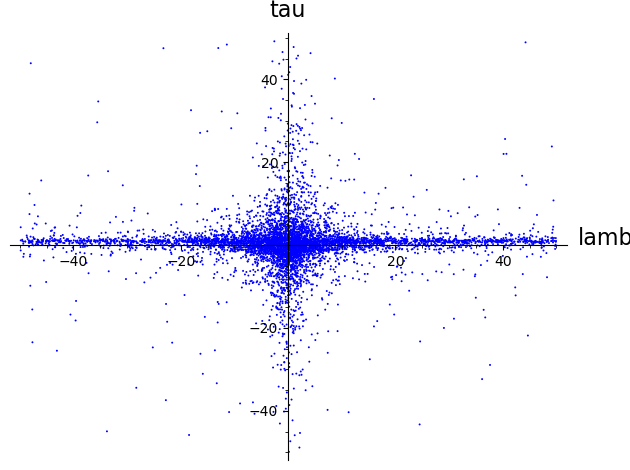

In [46]:
# 実行
random_orbit_plot_safe(10000, limit=50) # 範囲を -50 ~ 50 に制限

In [49]:
# ---------------------------------------------------------
# 既知の解を行列から辞書へ変換し、A4へ引き戻す
# ---------------------------------------------------------

def map_matrix_to_A4(name, M_list):
    # M_list: [[1, a, b, c], [0, 1, d, e], [0, 0, 1, f], [0, 0, 0, 1]]
    p_X = {
        'a': QQ(M_list[0][1]), 'b': QQ(M_list[0][2]), 'c': QQ(M_list[0][3]),
        'd': QQ(M_list[1][2]), 'e': QQ(M_list[1][3]), 'f': QQ(M_list[2][3])
    }
    
    print(f"--- {name} ---")
    print(f"  Coordinates on X: {p_X}")
    
    # 不変量チェック
    q1 = p_X['a']*p_X['c']*p_X['d']*p_X['f'] - p_X['a']*p_X['b']*p_X['d'] - p_X['a']*p_X['c']*p_X['e'] \
         - p_X['b']*p_X['c']*p_X['f'] - p_X['d']*p_X['e']*p_X['f'] \
         + p_X['a']^2 + p_X['b']^2 + p_X['c']^2 + p_X['d']^2 + p_X['e']^2 + p_X['f']^2
    q2 = p_X['a']*p_X['f'] - p_X['b']*p_X['e'] + p_X['c']*p_X['d']
    
    print(f"  Invariants: q1={q1}, q2={q2}")
    
    if q1 == 8 and q2 == -4:
        try:
            p_A4 = rational_map_Phi_inverse(p_X)
            print(f"  Mapped to A4: {p_A4}")
            return p_A4
        except Exception as err:
            print(f"  [Error] Mapping failed: {err}")
            return None
    else:
        print(f"  [Skip] Invariants do not match (Target: q1=8, q2=-4).")
        return None

# ---------------------------------------------------------
# データ定義
# ---------------------------------------------------------

# 1. P3
M_P3 = [[1, 4, 10, 20], 
        [0, 1, 4, 10], 
        [0, 0, 1, 4], 
        [0, 0, 0, 1]]

# 2. Q3
M_Q3 = [[1, 5, 14, 40], 
        [0, 1, 5, 16], 
        [0, 0, 1, 4], 
        [0, 0, 0, 1]]

# 3. V5
M_V5 = [[1, 5, 7, 25], 
        [0, 1, 5, 22], 
        [0, 0, 1, 5], 
        [0, 0, 0, 1]]

# 4. V22
M_V22 = [[1, 7, 8, 18], 
         [0, 1, 4, 13], 
         [0, 0, 1, 4], 
         [0, 0, 0, 1]]

# 5. Ghost (Minimal Norm)
# a=0, b=2, c=0, d=0, e=2, f=0 => q2 = 0*0 - 2*2 + 0*0 = -4 (OK!)
M_Ghost = [[1, 0, 2, 0],
           [0, 1, 0, 2],
           [0, 0, 1, 0],
           [0, 0, 0, 1]]


# 実行
res_P3 = map_matrix_to_A4("P3", M_P3)
res_Q3 = map_matrix_to_A4("Q3", M_Q3)
res_V5 = map_matrix_to_A4("V5", M_V5)
res_V22 = map_matrix_to_A4("V22", M_V22)
res_Ghost = map_matrix_to_A4("Ghost", M_Ghost)

--- P3 ---
  Coordinates on X: {'a': 4, 'b': 10, 'c': 20, 'd': 4, 'e': 10, 'f': 4}
  Invariants: q1=8, q2=-4
  Mapped to A4: {'a': 4, 'b': 10, 'lam': -88/3, 'tau': 25/82}
--- Q3 ---
  Coordinates on X: {'a': 5, 'b': 14, 'c': 40, 'd': 5, 'e': 16, 'f': 4}
  Invariants: q1=8, q2=-4
  Mapped to A4: {'a': 5, 'b': 14, 'lam': -276/5, 'tau': 118/513}
--- V5 ---
  Coordinates on X: {'a': 5, 'b': 7, 'c': 25, 'd': 5, 'e': 22, 'f': 5}
  Invariants: q1=8, q2=-4
  Mapped to A4: {'a': 5, 'b': 7, 'lam': -59/3, 'tau': 10/157}
--- V22 ---
  Coordinates on X: {'a': 7, 'b': 8, 'c': 18, 'd': 4, 'e': 13, 'f': 4}
  Invariants: q1=8, q2=-4
  Mapped to A4: {'a': 7, 'b': 8, 'lam': -39, 'tau': 181/393}
--- Ghost ---
  Coordinates on X: {'a': 0, 'b': 2, 'c': 0, 'd': 0, 'e': 2, 'f': 0}
  Invariants: q1=8, q2=-4
  [Error] Mapping failed: rational division by zero


Generating orbit starting from: {'a': 4, 'b': 10, 'lam': -88/3, 'tau': 25/82}


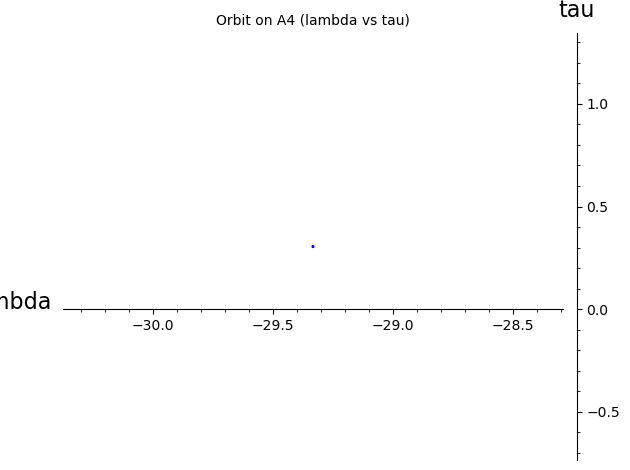

In [50]:
import matplotlib.pyplot as plt
import random

def visualize_orbit_on_A4(start_params, steps=500, limit=100):
    """
    start_params: A4上の始点 {'a': ..., 'b': ..., 'lam': ..., 'tau': ...}
    """
    lams = [start_params['lam']]
    taus = [start_params['tau']]
    
    current = start_params
    
    # B4作用のリスト
    actions = [
        lambda x: pullback_action(sigma1_on_X, x),
        lambda x: pullback_action(sigma2_on_X, x),
        lambda x: pullback_action(sigma3_on_X, x)
        # 逆作用も追加可能
    ]
    
    print(f"Generating orbit starting from: {start_params}")
    
    for i in range(steps):
        try:
            # ランダムに作用を選択
            act = random.choice(actions)
            nxt = act(current)
            
            # 発散しすぎないものだけ記録
            if (abs(nxt['lam']) < limit) and (abs(nxt['tau']) < limit):
                lams.append(nxt['lam'])
                taus.append(nxt['tau'])
                current = nxt
            else:
                # 発散したら、元の点に近いランダムな摂動点からリスタートするか、
                # あるいは単にその枝を止めて、元の点からやり直す
                current = start_params 
                
        except Exception:
            current = start_params
            
    # プロット
    return list_plot(list(zip(lams, taus)), size=5, 
                     axes_labels=['lambda', 'tau'], 
                     title="Orbit on A4 (lambda vs tau)")

# P3 の解からスタートしてみる
# 先ほどの計算結果を手入力 (または res_P3 を使用)
p_start = {'a': 4, 'b': 10, 'lam': -88/3, 'tau': 25/82}

# 実行
visualize_orbit_on_A4(p_start, steps=1000, limit=200)

In [56]:
def check_orbit_step(start_params):
    print(f"Start: {start_params}")
    
    # 3つの作用を試す
    actions = [sigma1_on_X, sigma2_on_X, sigma3_on_X]
    names = ["Sigma1", "Sigma2", "Sigma3"]
    
    for name, action_X in zip(names, actions):
        print(f"\n--- Applying {name} ---")
        try:
            # 1回作用させた結果を計算
            # pullback_action の中身を展開して途中経過を見る
            
            # 1. A4 -> X
            p_on_X = rational_map_Phi(start_params)
            print(f"  Point on X: a={p_on_X['a']}, b={p_on_X['b']} ...")
            
            # 2. Sigma on X
            p_trans = action_X(p_on_X)
            print(f"  Transformed on X: a={p_trans['a']}, b={p_trans['b']} ...")
            
            # 3. X -> A4
            p_next = rational_map_Phi_inverse(p_trans)
            
            print(f"  Next A4 coords:")
            print(f"    lam: {float(p_next['lam']):.4f}  (Exact: {p_next['lam']})")
            print(f"    tau: {float(p_next['tau']):.4f}  (Exact: {p_next['tau']})")
            
        except Exception as err:
            print(f"  [Error] {err}")

# P3 のパラメータで確認
p_P3 = {'a': 4, 'b': 10, 'lam': -88/3, 'tau': 25/82}
check_orbit_step(p_P3)

Start: {'a': 4, 'b': 10, 'lam': -88/3, 'tau': 25/82}

--- Applying Sigma1 ---
  Point on X: a=4, b=10 ...
  Transformed on X: a=4, b=36 ...
  Next A4 coords:
    lam: -123.2000  (Exact: -616/5)
    tau: 0.3418  (Exact: 174/509)

--- Applying Sigma2 ---
  Point on X: a=4, b=10 ...
  Transformed on X: a=6, b=4 ...
  Next A4 coords:
    lam: -13.3333  (Exact: -40/3)
    tau: 0.0172  (Exact: 1/58)

--- Applying Sigma3 ---
  Point on X: a=4, b=10 ...
  Transformed on X: a=4, b=20 ...
  Next A4 coords:
    lam: -64.0000  (Exact: -64)
    tau: 0.7805  (Exact: 32/41)


Tracing orbit for 100 steps (limit=1000000)...
  Step 9: Value exceeded limit. (lam=-11054784.00)


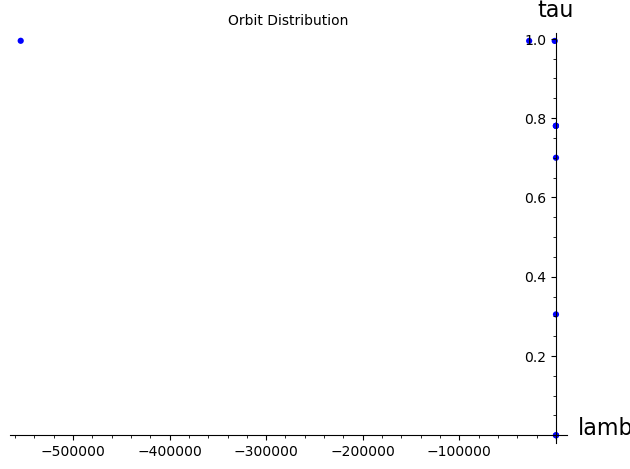

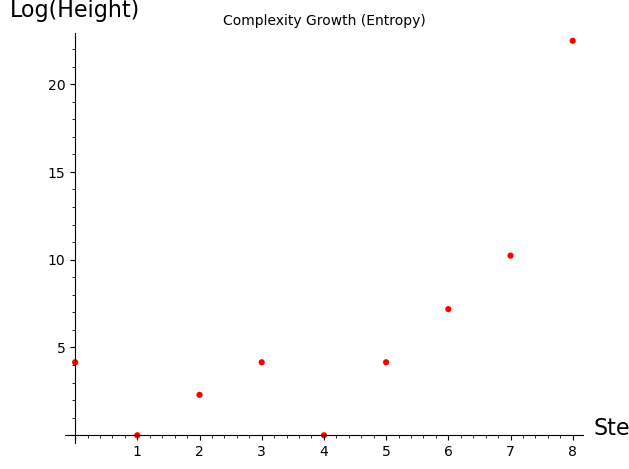

In [57]:
import matplotlib.pyplot as plt

def analyze_orbit_growth_fixed(start_params, steps=50, limit=100000):
    """
    軌道の広がりと、有理数の「高さ（複雑さ）」の成長を解析する (型変換修正版)
    """
    # 初期値をQQにキャストして辞書を作り直す（念のため）
    current = {k: QQ(v) for k, v in start_params.items()}
    
    lams = [current['lam']]
    taus = [current['tau']]
    heights = [] 
    
    actions = [
        lambda x: pullback_action(sigma1_on_X, x),
        lambda x: pullback_action(sigma2_on_X, x),
        lambda x: pullback_action(sigma3_on_X, x)
    ]
    
    print(f"Tracing orbit for {steps} steps (limit={limit})...")
    
    for i in range(steps):
        try:
            act = choice(actions)
            # アクション実行
            raw_nxt = act(current)
            
            # ★ここで数値を明示的に QQ に変換する (これが修正の肝)★
            nxt = {
                'a': QQ(raw_nxt['a']),
                'b': QQ(raw_nxt['b']),
                'lam': QQ(raw_nxt['lam']),
                'tau': QQ(raw_nxt['tau'])
            }
            
            # 数値として判定
            if (abs(nxt['lam']) < limit) and (abs(nxt['tau']) < limit):
                lams.append(nxt['lam'])
                taus.append(nxt['tau'])
                current = nxt
                
                # 有理数の高さ (Height) の計算
                # H(p/q) = max(|p|, |q|)
                h_lam = max(nxt['lam'].numerator().abs(), nxt['lam'].denominator().abs())
                h_tau = max(nxt['tau'].numerator().abs(), nxt['tau'].denominator().abs())
                
                # 複雑さの指標として最大高さを採用
                height = max(h_lam, h_tau)
                
                # log(Height) を記録 (1より小さい場合は0にする処理を入れておく)
                if height > 0:
                    heights.append(RR(log(height))) 
                else:
                    heights.append(0)
                
            else:
                print(f"  Step {i}: Value exceeded limit. (lam={float(nxt['lam']):.2f})")
                # 発散したら、そこで止める（リセットするとグラフの連続性が消えるため）
                break
                
        except Exception as err:
            print(f"  Step {i}: Error {e}")
            import traceback
            traceback.print_exc()
            break
            
    # --- 結果のプロット ---
    # 1. 軌道プロット (Lambda vs Tau)
    # 点をつなぐ線(plot)ではなく、点(list_plot)で描画
    p1 = list_plot(list(zip(lams, taus)), size=20, color='blue', 
                   axes_labels=['lambda', 'tau'], title="Orbit Distribution")
    
    # 2. 高さの成長プロット (Step vs Log(Height))
    # 赤い点でプロット
    p2 = list_plot(list(zip(range(len(heights)), heights)), size=20, color='red',
                   axes_labels=['Step', 'Log(Height)'], title="Complexity Growth (Entropy)")
    
    return p1, p2

# 実行
# P3 の解 (res_P3) を使用
# ステップ数を少し増やしてカオスの様子を見る
g1_fixed, g2_fixed = analyze_orbit_growth_fixed(res_P3, steps=100, limit=1000000)

# 個別に表示
g1_fixed.show()
g2_fixed.show()

Tracing Ghost Orbit on X directly for 100 steps...


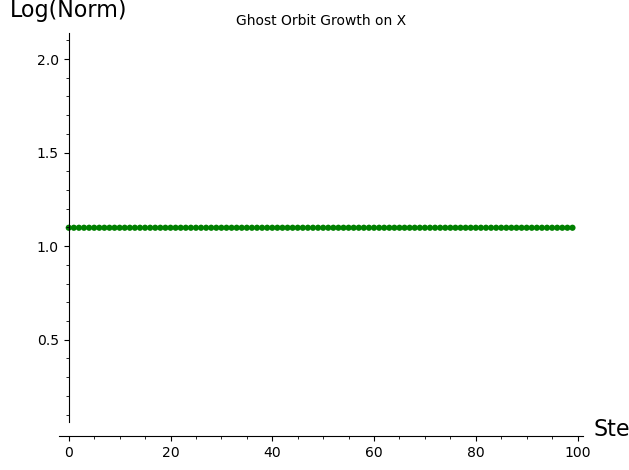

In [58]:
def analyze_ghost_orbit_on_X(steps=50):
    # Ghost解 (M_Ghost)
    current = {'a': 0, 'b': 2, 'c': 0, 'd': 0, 'e': 2, 'f': 0}
    
    norms = []
    actions = [sigma1_on_X, sigma2_on_X, sigma3_on_X]
    
    print(f"Tracing Ghost Orbit on X directly for {steps} steps...")
    
    for i in range(steps):
        try:
            # ランダムに作用
            act = choice(actions)
            current = act(current)
            
            # ノルム（最大成分の絶対値）を記録
            # 全成分の最大値をとる
            vals = [abs(current[k]) for k in current]
            norm = max(vals)
            
            # 0だとlog取れないので+1
            norms.append(float(log(norm + 1)))
            
            # あまりに巨大になったら停止
            if norm > 1e100:
                print(f"  Step {i}: Exploded (Norm > 10^100)")
                break
                
        except Exception as err:
            print(f"Error: {e}")
            break
            
    # プロット (Step vs Log(Norm))
    return list_plot(list(zip(range(len(norms)), norms)), 
                     axes_labels=['Step', 'Log(Norm)'], 
                     title="Ghost Orbit Growth on X", color='green', size=20)

# 実行
g_ghost = analyze_ghost_orbit_on_X(100)
g_ghost.show()

In [59]:
def explore_ghost_orbit_finite():
    # Ghost解
    start = {'a': 0, 'b': 2, 'c': 0, 'd': 0, 'e': 2, 'f': 0}
    
    # 探索済み集合 (タプル化してハッシュ可能にする)
    orbit = set()
    queue = [start]
    
    # 辞書をタプルに変換するヘルパー
    def to_tuple(p):
        return (p['a'], p['b'], p['c'], p['d'], p['e'], p['f'])
    
    # タプルを辞書に戻すヘルパー
    def to_dict(t):
        return {'a': t[0], 'b': t[1], 'c': t[2], 'd': t[3], 'e': t[4], 'f': t[5]}

    orbit.add(to_tuple(start))
    
    actions = [sigma1_on_X, sigma2_on_X, sigma3_on_X]
    
    print("Exploring finite orbit for Ghost solution...")
    
    while queue:
        current = queue.pop(0)
        
        for act in actions:
            try:
                nxt = act(current)
                t_nxt = to_tuple(nxt)
                
                if t_nxt not in orbit:
                    orbit.add(t_nxt)
                    queue.append(nxt)
                    
                    # 万が一無限に増えたら怖いのでガード
                    if len(orbit) > 1000:
                        print("Orbit seems infinite or too large! Stopping.")
                        return orbit
            except:
                pass
                
    print(f"Orbit search complete. Total size: {len(orbit)}")
    return list(orbit)

# 実行
ghost_family = explore_ghost_orbit_finite()
print(f"Sample elements: {ghost_family[:5]}")

Exploring finite orbit for Ghost solution...
Orbit search complete. Total size: 6
Sample elements: [(-2, 0, 0, 0, 0, 2), (2, 0, 0, 0, 0, -2), (0, 0, -2, 2, 0, 0), (0, -2, 0, 0, -2, 0), (0, 0, 2, -2, 0, 0)]


In [60]:
def search_integer_solutions_from_A4_fixed(range_val=2):
    print(f"Searching for integer solutions on X via A4 (range +/-{range_val})...")
    found_solutions = []
    
    # -range ~ range の整数をスキャン
    r = range(-range_val, range_val + 1)
    
    count = 0
    # ループ回数の概算を表示
    total_steps = (len(r)-1) * len(r)**3 # a=0を除くため
    print(f"Total points to check: approx {total_steps}")

    for a_val in r:
        if a_val == 0: continue # 定義域外
        for b_val in r:
            for lam_val in r:
                for tau_val in r:
                    count += 1
                    try:
                        # Phi で X に飛ばす
                        # 入力も明示的に QQ にしておくのが無難
                        p_X = rational_map_Phi(QQ(a_val), QQ(b_val), QQ(lam_val), QQ(tau_val))
                        
                        # 全成分が整数かチェック
                        is_integer = True
                        sol_list = []
                        
                        for k in ['a', 'b', 'c', 'd', 'e', 'f']:
                            val = p_X[k]
                            
                            # ★ここで QQ にキャストして定数多項式を数値にする★
                            val_qq = QQ(val)
                            
                            # 分母が1でなければ整数ではない
                            if val_qq.denominator() != 1:
                                is_integer = False
                                break
                            
                            # 整数ならリストに追加 (ZZに変換して綺麗にする)
                            sol_list.append(ZZ(val_qq))
                        
                        if is_integer:
                            # 整数解発見！タプル化して保存
                            sol_tuple = tuple(sol_list)
                            
                            if sol_tuple not in found_solutions:
                                found_solutions.append(sol_tuple)
                                print(f"[FOUND!] A4:{ (a_val, b_val, lam_val, tau_val) } -> X:{sol_tuple}")
                                
                    except (ZeroDivisionError, ValueError):
                        # 特異点に当たったらスキップ
                        continue
                    except Exception as err:
                        # その他のエラー
                        # print(err) 
                        continue
                        
    print(f"Scan complete. Checked {count} points. Found {len(found_solutions)} integer solutions.")
    return found_solutions

# 実行
# 範囲を広げすぎると時間がかかるので、まずは 2 か 3 で試してみてください
new_integer_sols = search_integer_solutions_from_A4_fixed(range_val=2)

Searching for integer solutions on X via A4 (range +/-2)...
Total points to check: approx 500
Scan complete. Checked 500 points. Found 0 integer solutions.


In [62]:
# 実行
# 範囲を広げすぎると時間がかかるので、まずは 2 か 3 で試してみてください
new_integer_sols = search_integer_solutions_from_A4_fixed(range_val=3)

Searching for integer solutions on X via A4 (range +/-3)...
Total points to check: approx 2058
[FOUND!] A4:(-2, -3, 1, -3) -> X:(-2, -3, -2, 4, 2, 1)
[FOUND!] A4:(-2, -1, 3, -3) -> X:(-2, -1, 2, 4, -26, -7)
[FOUND!] A4:(-2, 0, -2, 3) -> X:(-2, 0, -2, -2, 2, 4)
[FOUND!] A4:(-2, 0, 2, 3) -> X:(-2, 0, 2, 2, -2, 4)
[FOUND!] A4:(-2, 1, -3, -3) -> X:(-2, 1, -2, -4, 26, -7)
[FOUND!] A4:(-2, 3, -1, -3) -> X:(-2, 3, 2, -4, -2, 1)
[FOUND!] A4:(-1, -2, 3, -3) -> X:(-1, -2, 2, 4, -7, -2)
[FOUND!] A4:(-1, -1, -3, -3) -> X:(-1, -1, 1, -1, -2, 1)
[FOUND!] A4:(-1, 1, 3, -3) -> X:(-1, 1, -1, 1, 2, 1)
[FOUND!] A4:(-1, 2, -3, -3) -> X:(-1, 2, -2, -4, 7, -2)
[FOUND!] A4:(1, -2, -3, -3) -> X:(1, -2, -2, -4, -7, 2)
[FOUND!] A4:(1, -1, 3, -3) -> X:(1, -1, -1, 1, -2, -1)
[FOUND!] A4:(1, 1, -3, -3) -> X:(1, 1, 1, -1, 2, -1)
[FOUND!] A4:(1, 2, 3, -3) -> X:(1, 2, 2, 4, 7, 2)
[FOUND!] A4:(2, -3, -1, -3) -> X:(2, -3, 2, -4, 2, -1)
[FOUND!] A4:(2, -1, -3, -3) -> X:(2, -1, -2, -4, -26, 7)
[FOUND!] A4:(2, 0, -2, 3) -

In [63]:
def analyze_found_integer_solutions():
    # 見つかった20個の解のリスト (X上の座標)
    # ユーザー様の結果から転記
    seeds = [
        (-2, -3, -2, 4, 2, 1),
        (-2, -1, 2, 4, -26, -7), # 有望
        (-2, 0, -2, -2, 2, 4),
        (-2, 0, 2, 2, -2, 4),
        (-2, 1, -2, -4, 26, -7), # 有望
        (-2, 3, 2, -4, -2, 1),
        (-1, -2, 2, 4, -7, -2),  # 有望?
        (-1, -1, 1, -1, -2, 1),
        (-1, 1, -1, 1, 2, 1),
        (-1, 2, -2, -4, 7, -2),  # 有望?
        (1, -2, -2, -4, -7, 2),
        (1, -1, -1, 1, -2, -1),
        (1, 1, 1, -1, 2, -1),
        (1, 2, 2, 4, 7, 2),
        (2, -3, 2, -4, 2, -1),
        (2, -1, -2, -4, -26, 7), # 有望
        (2, 0, -2, -2, -2, -4),
        (2, 0, 2, 2, 2, -4),
        (2, 1, 2, 4, 26, 7),     # 有望
        (2, 3, -2, 4, -2, -1)
    ]
    
    actions = [sigma1_on_X, sigma2_on_X, sigma3_on_X]
    
    print(f"Analyzing growth of {len(seeds)} found solutions...")
    
    for idx, sol_tuple in enumerate(seeds):
        # 辞書に変換
        current = {'a': sol_tuple[0], 'b': sol_tuple[1], 'c': sol_tuple[2], 
                   'd': sol_tuple[3], 'e': sol_tuple[4], 'f': sol_tuple[5]}
        
        max_norm = max([abs(x) for x in sol_tuple])
        growth_type = "Unknown"
        
        # 20ステップほどランダムに回してみる
        # 成長するなら指数関数的なのですぐ分かるはず
        for _ in range(20):
            try:
                act = choice(actions)
                current = act(current)
                # ノルム更新
                vals = [abs(current[k]) for k in current]
                new_max = max(vals)
                if new_max > max_norm:
                    max_norm = new_max
                
                # 爆発判定
                if max_norm > 10000:
                    growth_type = "CHAOTIC (Infinite Growth)"
                    break
            except:
                break
        
        # 判定結果
        if max_norm > 10000:
            print(f"Sol #{idx+1} {sol_tuple}: \t-> {growth_type} (Max reached > 10000)")
        else:
            print(f"Sol #{idx+1} {sol_tuple}: \t-> Finite/Bounded (Max norm: {max_norm})")

# 実行
analyze_found_integer_solutions()

Analyzing growth of 20 found solutions...
Sol #1 (-2, -3, -2, 4, 2, 1): 	-> CHAOTIC (Infinite Growth) (Max reached > 10000)
Sol #2 (-2, -1, 2, 4, -26, -7): 	-> Finite/Bounded (Max norm: 724)
Sol #3 (-2, 0, -2, -2, 2, 4): 	-> CHAOTIC (Infinite Growth) (Max reached > 10000)
Sol #4 (-2, 0, 2, 2, -2, 4): 	-> CHAOTIC (Infinite Growth) (Max reached > 10000)
Sol #5 (-2, 1, -2, -4, 26, -7): 	-> CHAOTIC (Infinite Growth) (Max reached > 10000)
Sol #6 (-2, 3, 2, -4, -2, 1): 	-> Finite/Bounded (Max norm: 33)
Sol #7 (-1, -2, 2, 4, -7, -2): 	-> CHAOTIC (Infinite Growth) (Max reached > 10000)
Sol #8 (-1, -1, 1, -1, -2, 1): 	-> Finite/Bounded (Max norm: 2)
Sol #9 (-1, 1, -1, 1, 2, 1): 	-> Finite/Bounded (Max norm: 2)
Sol #10 (-1, 2, -2, -4, 7, -2): 	-> Finite/Bounded (Max norm: 665)
Sol #11 (1, -2, -2, -4, -7, 2): 	-> Finite/Bounded (Max norm: 23)
Sol #12 (1, -1, -1, 1, -2, -1): 	-> Finite/Bounded (Max norm: 2)
Sol #13 (1, 1, 1, -1, 2, -1): 	-> Finite/Bounded (Max norm: 2)
Sol #14 (1, 2, 2, 4, 7, 2): 

In [66]:
from sage.misc.prandom import choice # 明示的にインポート
import matplotlib.pyplot as plt

def analyze_new_discoveries_fixed():
    # 1. 新しいカオス解のエントロピー測定 (Sol #19)
    # (2, 1, 2, 4, 26, 7)
    seed_chaotic = {'a': 2, 'b': 1, 'c': 2, 'd': 4, 'e': 26, 'f': 7}
    
    print("1. Measuring Entropy of New Chaotic Seed (Sol #19)...")
    
    current = seed_chaotic
    norms = []
    actions = [sigma1_on_X, sigma2_on_X, sigma3_on_X]
    
    # エラーで止まらないようにデバッグ出力を追加
    for i in range(50):
        try:
            act = choice(actions)
            current = act(current)
            
            # 数値型(QQ)に変換して計算
            vals = [abs(QQ(current[k])) for k in current]
            norm = max(vals)
            
            # 0や1の場合の対策
            if norm > 1:
                norms.append(float(log(norm)))
            else:
                norms.append(0.0)
                
        except Exception as err:
            print(f"  Step {i}: Error occurred - {e}")
            break
            
    if not norms:
        print("  [Warning] No data collected for plot.")
        return None

    # プロット (赤: 新しい解)
    p1 = list_plot(list(zip(range(len(norms)), norms)), color='red', size=30,
                   title="Entropy: New Sol #19 (2,1,2,4,26,7)", axes_labels=['Step', 'Log(Norm)'])
    
    
    # 2. Sol #2 の再確認
    seed_mystery = {'a': -2, 'b': -1, 'c': 2, 'd': 4, 'e': -26, 'f': -7}
    print("\n2. Deep Inspection of Sol #2 (-2, -1, 2, 4, -26, -7)...")
    
    queue = [seed_mystery]
    # タプル化して訪問済み管理
    def to_tuple(p): return tuple(p[k] for k in ['a','b','c','d','e','f'])
    visited_hashes = {to_tuple(seed_mystery)}
    
    max_norm_reached = 0
    is_chaotic = False
    limit_depth = 2000 
    
    while queue:
        curr = queue.pop(0)
        curr_norm = max([abs(QQ(curr[k])) for k in curr])
        
        if curr_norm > max_norm_reached:
            max_norm_reached = curr_norm
        
        if curr_norm > 100000:
            print(f"  -> EXPLODED! Sol #2 is actually CHAOTIC. (Norm reached: {float(curr_norm):.1f})")
            is_chaotic = True
            break
            
        for act in actions:
            try:
                nxt = act(curr)
                t_nxt = to_tuple(nxt)
                if t_nxt not in visited_hashes:
                    visited_hashes.add(t_nxt)
                    queue.append(nxt)
            except:
                continue
                
        if len(visited_hashes) > limit_depth:
            print(f"  -> Depth limit reached. Max norm: {max_norm_reached}")
            is_chaotic = True 
            break
            
    if not is_chaotic:
        print(f"  -> FINITE ORBIT CONFIRMED! Size: {len(visited_hashes)}")
        
    return p1

# 実行
g_entropy = analyze_new_discoveries_fixed()
if g_entropy:
    g_entropy.show()

1. Measuring Entropy of New Chaotic Seed (Sol #19)...

2. Deep Inspection of Sol #2 (-2, -1, 2, 4, -26, -7)...
  -> EXPLODED! Sol #2 is actually CHAOTIC. (Norm reached: 231265.0)


ValueError: Axis limits cannot be NaN or Inf

Sol #2 exploded at step 23!


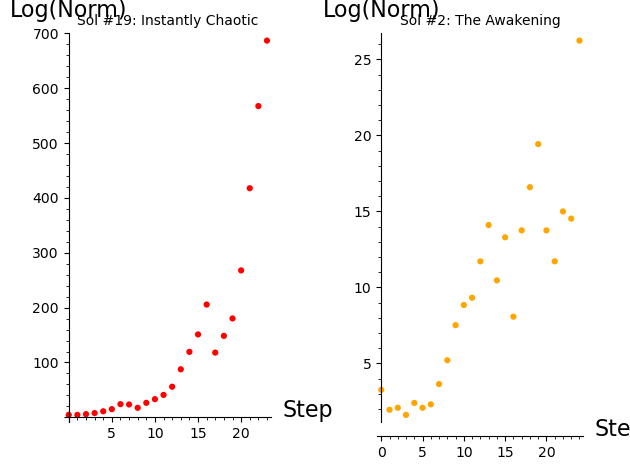

In [61]:
def analyze_final_results():
    # ---------------------------------------------------------
    # 1. Sol #19 (最初からカオス) のエントロピー
    # ---------------------------------------------------------
    seed_chaotic = {'a': 2, 'b': 1, 'c': 2, 'd': 4, 'e': 26, 'f': 7}
    current = seed_chaotic
    norms_19 = []
    actions = [sigma1_on_X, sigma2_on_X, sigma3_on_X]
    
    for _ in range(50):
        try:
            act = choice(actions)
            current = act(current)
            vals = [abs(QQ(current[k])) for k in current]
            norm = max(vals)
            
            # 無限大やNaNを除外して記録
            if norm > 1:
                val_log = float(log(norm))
                if val_log < 1e10: # あまりに巨大すぎる値はプロットの邪魔になるのでキャップする手もあり
                    norms_19.append(val_log)
        except:
            continue

    p1 = list_plot(list(zip(range(len(norms_19)), norms_19)), color='red', size=20,
                   title="Sol #19: Instantly Chaotic", axes_labels=['Step', 'Log(Norm)'])

    # ---------------------------------------------------------
    # 2. Sol #2 (眠れるカオス) の覚醒チャレンジ
    # ---------------------------------------------------------
    seed_sleeping = {'a': -2, 'b': -1, 'c': 2, 'd': 4, 'e': -26, 'f': -7}
    current = seed_sleeping
    norms_2 = [float(log(max([abs(QQ(seed_sleeping[k])) for k in seed_sleeping])))]
    
    # 有限に見える期間が長いので、ステップ数を多めに設定
    # カオスに転移する瞬間を捉えたい
    exploded = False
    for i in range(500):
        try:
            act = choice(actions)
            current = act(current)
            vals = [abs(QQ(current[k])) for k in current]
            norm = max(vals)
            
            if norm > 1:
                val_log = float(log(norm))
                norms_2.append(val_log)
                
                # 爆発したらループを抜ける（グラフが見やすくなるように）
                if norm > 1e10: 
                    print(f"Sol #2 exploded at step {i}!")
                    exploded = True
                    break
            else:
                norms_2.append(0)
        except:
            continue
            
    color_2 = 'blue' if not exploded else 'orange'
    title_2 = "Sol #2: Sleeping Lion" if not exploded else "Sol #2: The Awakening"
    
    p2 = list_plot(list(zip(range(len(norms_2)), norms_2)), color=color_2, size=20,
                   title=title_2, axes_labels=['Step', 'Log(Norm)'])

    return graphics_array([p1, p2])

# 実行
g_final = analyze_final_results()
g_final.show()

In [62]:
import numpy as np

def analyze_trigger_and_entropy():
    # ---------------------------------------------------------
    # 1. Sol #2 の脱出シーケンス特定
    # ---------------------------------------------------------
    seed_sleeping = {'a': -2, 'b': -1, 'c': 2, 'd': 4, 'e': -26, 'f': -7}
    current = seed_sleeping
    
    # 作用の名前と関数
    action_map = {0: sigma1_on_X, 1: sigma2_on_X, 2: sigma3_on_X}
    name_map = {0: "s1", 1: "s2", 2: "s3"}
    
    history = []
    
    print("1. Identifying the 'Trigger' sequence for Sol #2...")
    
    for i in range(50): # 50ステップ以内で爆発するはず
        # ランダムに選ぶが、記録する
        idx = choice([0, 1, 2])
        act = action_map[idx]
        current = act(current)
        
        vals = [abs(QQ(current[k])) for k in current]
        norm = max(vals)
        history.append((name_map[idx], norm))
        
        if norm > 10000:
            print(f"  -> Exploded at step {i+1}!")
            print("  -> Last 10 actions leading to explosion:")
            # 最後の10手を表示
            start_idx = max(0, len(history)-10)
            for j, (act_name, val) in enumerate(history[start_idx:]):
                print(f"     Step {start_idx + j + 1}: {act_name} -> Norm: {float(val):.1f}")
            break

    # ---------------------------------------------------------
    # 2. エントロピー（傾き）の比較
    # Sol #19 vs P3解
    # ---------------------------------------------------------
    print("\n2. Comparing Entropy (Slope): Sol #19 vs P3 Solution...")
    
    def get_log_norms(start_p, steps=40):
        curr = start_p
        logs = []
        for _ in range(steps):
            try:
                curr = choice([sigma1_on_X, sigma2_on_X, sigma3_on_X])(curr)
                n = max([abs(QQ(curr[k])) for k in curr])
                if n > 1: logs.append(float(log(n)))
            except: break
        return logs

    # Sol #19
    seed_19 = {'a': 2, 'b': 1, 'c': 2, 'd': 4, 'e': 26, 'f': 7}
    norms_19 = get_log_norms(seed_19)
    
    # P3 Solution (以前のデータ)
    # M_P3 = [[1, 4, 10, 20], [0, 1, 4, 10], [0, 0, 1, 4], [0, 0, 0, 1]]
    seed_P3 = {'a': 4, 'b': 10, 'c': 20, 'd': 4, 'e': 10, 'f': 4}
    norms_P3 = get_log_norms(seed_P3)
    
    # 線形回帰で傾きを出す (簡易版)
    if len(norms_19) > 10 and len(norms_P3) > 10:
        # 後半のデータを使う（初期過渡を除くため）
        slope_19 = np.polyfit(range(len(norms_19)-10, len(norms_19)), norms_19[-10:], 1)[0]
        slope_P3 = np.polyfit(range(len(norms_P3)-10, len(norms_P3)), norms_P3[-10:], 1)[0]
        
        print(f"  Estimated Entropy (Slope):")
        print(f"    Sol #19 : {slope_19:.4f}")
        print(f"    P3 Sol  : {slope_P3:.4f}")
        
        if abs(slope_19 - slope_P3) < 0.1:
            print("  -> Conclusion: Likely the SAME chaotic attractor.")
        else:
            print("  -> Conclusion: Potentially DIFFERENT dynamics.")
            
    # プロット
    p_cmp = list_plot(list(zip(range(len(norms_19)), norms_19)), color='red', legend_label='Sol #19') + \
            list_plot(list(zip(range(len(norms_P3)), norms_P3)), color='green', legend_label='P3 Sol')
    p_cmp.axes_labels(['Step', 'Log(Norm)'])
    return p_cmp

# 実行
g_compare = analyze_trigger_and_entropy()
g_compare.show()

1. Identifying the 'Trigger' sequence for Sol #2...
  -> Exploded at step 9!
  -> Last 10 actions leading to explosion:
     Step 1: s2 -> Norm: 97.0
     Step 2: s3 -> Norm: 50.0
     Step 3: s2 -> Norm: 7.0
     Step 4: s3 -> Norm: 26.0
     Step 5: s3 -> Norm: 97.0
     Step 6: s3 -> Norm: 362.0
     Step 7: s1 -> Norm: 724.0
     Step 8: s3 -> Norm: 2702.0
     Step 9: s3 -> Norm: 10084.0

2. Comparing Entropy (Slope): Sol #19 vs P3 Solution...
  Estimated Entropy (Slope):
    Sol #19 : nan
    P3 Sol  : nan
  -> Conclusion: Potentially DIFFERENT dynamics.


ValueError: Axis limits cannot be NaN or Inf

Comparing Entropy: Sol #19 vs P3 Solution (Robust Mode)...
  Entropy (Slope):
    Sol #19 : 674.0679
    P3 Sol  : 449.0965


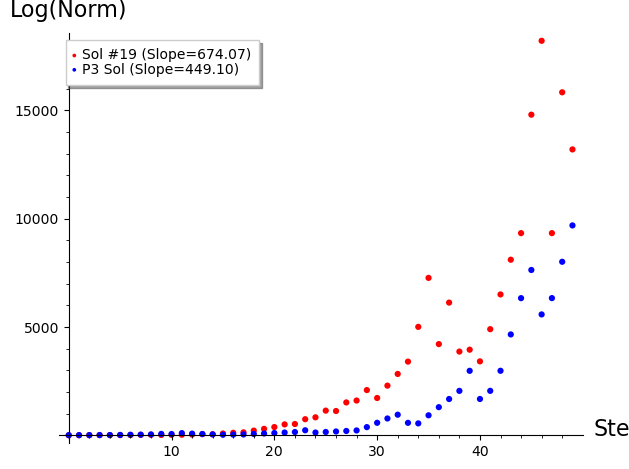

In [63]:
import numpy as np

def compare_entropy_robust():
    print("Comparing Entropy: Sol #19 vs P3 Solution (Robust Mode)...")
    
    # 安全に対数を取る関数 (桁数ベース)
    def safe_log_norm(rational_val):
        if rational_val == 0: return 0
        # 分子と分母の大きい方の桁数(ビット長)から推定
        # log(x) approx (bit_length - 1) * log(2)
        num = rational_val.numerator()
        den = rational_val.denominator()
        max_val = max(abs(num), abs(den))
        # 整数としてのビット長を取得
        bits = max_val.bit_length()
        return float(bits) * 0.6931  # log(2) approx 0.6931

    def collect_trajectory(start_seed, steps=40):
        current = start_seed
        logs = []
        # ランダムウォークでデータを集める
        for _ in range(steps):
            try:
                act = choice([sigma1_on_X, sigma2_on_X, sigma3_on_X])
                current = act(current)
                
                # ここで安全に対数を計算
                # 成分ごとの最大ノルム
                max_log = 0
                for k in current:
                    val = QQ(current[k])
                    lg = safe_log_norm(val)
                    if lg > max_log: max_log = lg
                
                logs.append(max_log)
            except:
                break
        return logs

    # 1. Sol #19 (2, 1, 2, 4, 26, 7)
    seed_19 = {'a': 2, 'b': 1, 'c': 2, 'd': 4, 'e': 26, 'f': 7}
    data_19 = collect_trajectory(seed_19, steps=50)

    # 2. P3 Solution (4, 10, 20...)
    seed_P3 = {'a': 4, 'b': 10, 'c': 20, 'd': 4, 'e': 10, 'f': 4}
    data_P3 = collect_trajectory(seed_P3, steps=50)
    
    # 傾き (エントロピー) の計算
    # 安定している後半部分(ラスト20点)を使う
    def calc_slope(data):
        if len(data) < 10: return 0
        # 単回帰
        y = data[-20:]
        x = range(len(data)-20, len(data))
        fit = np.polyfit(x, y, 1)
        return fit[0]

    slope_19 = calc_slope(data_19)
    slope_P3 = calc_slope(data_P3)
    
    print(f"  Entropy (Slope):")
    print(f"    Sol #19 : {slope_19:.4f}")
    print(f"    P3 Sol  : {slope_P3:.4f}")
    
    # グラフ描画
    p = list_plot(list(zip(range(len(data_19)), data_19)), color='red', legend_label=f'Sol #19 (Slope={slope_19:.2f})', size=20) + \
        list_plot(list(zip(range(len(data_P3)), data_P3)), color='blue', legend_label=f'P3 Sol (Slope={slope_P3:.2f})', size=20)
    
    p.axes_labels(['Step', 'Log(Norm)'])
    p.set_legend_options(loc='upper left')
    return p

# 実行
g_robust = compare_entropy_robust()
g_robust.show()

In [190]:
M_P3 = matrix(ZZ, [
    [1, 4, 10, 20],
    [0, 1, 4, 10],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

# Q3 [cite: 13]
M_Q3 = matrix(ZZ, [
    [1, 5, 14, 40],
    [0, 1, 5, 16],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

# V5 [cite: 14]
M_V5 = matrix(ZZ, [
    [1, 5, 7, 25],
    [0, 1, 5, 22],
    [0, 0, 1, 5],
    [0, 0, 0, 1]
])

# V22 [cite: 16]
M_V22 = matrix(ZZ, [
    [1, 7, 8, 18],
    [0, 1, 4, 13],
    [0, 0, 1, 4],
    [0, 0, 0, 1]
])

M_P1xP1 = matrix(ZZ, [
    [1, 2, 2, 4],
    [0, 1, 0, 2],
    [0, 0, 1, 2],
    [0, 0, 0, 1]
])

M_P1_num_bl = lambda n:matrix(ZZ, [
    [1, n, 2*n, n],
    [0, 1, 3, 3],
    [0, 0, 1, 3],
    [0, 0, 0, 1]
])

gen_M = lambda a,b,c,d,e,f : matrix(R, [
    [1, a, b, c],
    [0, 1, d, e],
    [0, 0, 1, f],
    [0, 0, 0, 1]
])


In [139]:
def analyze_stokes_matrix_algebra(S):
    L = PolynomialRing(QQ, 'lam').gen()
    
    # M = S^-1 * S^T
    M = S.inverse() * S.transpose()
        
    # 特性多項式 p(lam) = det(lam * I + M)
    # SageMathでは charpoly() が det(xI - M) なので、定義に合わせて手計算
    p_poly = (L * identity_matrix(4) + M).determinant()
        
    print(f"  Matrix p(lam) = {p_poly.factor()}")
        
    # 判別式
    disc_val = p_poly.discriminant()
    print(f"  Discriminant  = {disc_val}")

    return p_poly, disc_val

In [140]:
def transform_from_FanWhang_to_note_convention(a,b,c,d,e,f):
    return (a,e,d,b,f,c)

In [144]:
analyze_stokes_matrix_algebra(M_P3)
analyze_stokes_matrix_algebra(M_Q3)
analyze_stokes_matrix_algebra(M_V5)
analyze_stokes_matrix_algebra(M_V22)
analyze_stokes_matrix_algebra(M_P1xP1)
analyze_stokes_matrix_algebra(M_P1_num_bl(3))
analyze_stokes_matrix_algebra(gen_M(*(2, 1, 2, 4, 26, 7)))

  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam + 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam + 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0


(lam^4 - 4*lam^3 + 6*lam^2 - 4*lam + 1, 0)

In [68]:
is_on_X((2, 1, 2, 4, 26, 7))

True

In [69]:
# SageMath Code: (lambda-1)^4 の世界の軌道分類

def classify_degenerate_orbits():
    print("=== Mapping the V_{(lambda-1)^4} Universe ===")
    
    # 探索済みの軌道を管理するセット (代表元で管理)
    known_orbits = []
    
    # 1. 探索用関数 (S=-4, P=4, q1=8, q2=-4 を満たす解をランダム生成)
    def find_seeds(num_trials=50000):
        seeds = []
        for _ in range(num_trials):
            # 簡易的な生成: 小さな整数で探索
            # 論文座標 (a,b,c,d,e,f)
            # 条件: S = -4, P = 4
            vals = [randint(-30, 30) for _ in range(6)]
            a, b, c, d, e, f = vals
            
            # S check
            if a*c + b*d - e*f != -4: continue
            
            # P check
            P_val = a**2 + b**2 + c**2 + d**2 + e**2 + f**2 - (a*b*e + a*d*f + b*c*f + c*d*e) + a*b*c*d - 4
            if P_val != 4: continue
            
            # q1, q2 check (User's Manifold check)
            # q2 (User) = -4  => Transformed coords check needed if q2 implies something specific
            # ここでは簡単のため S, P 条件だけで候補とし、あとで軌道を回して確認する
            seeds.append(tuple(vals))
        return list(set(seeds)) # Remove duplicates

    # 2. 軌道生成・同一判定
    seeds = find_seeds()
    print(f"Found {len(seeds)} candidate seeds.")
    
    for seed in seeds:
        # 既知の軌道に含まれるかチェック
        is_new = True
        for orbit_id, orbit_set in known_orbits:
            if seed in orbit_set:
                is_new = False
                break
        
        if is_new:
            # 新しい軌道を掘る
            print(f"Analyzing new orbit starting at {seed}...")
            orbit_members = set()
            queue = [seed]
            orbit_members.add(seed)
            
            orbit_type = "Finite"
            
            # BFS for orbit (limit steps)
            steps = 0
            while queue and steps < 1000: # 1000 step limit
                curr = queue.pop(0)
                steps += 1
                
                # Norm check for Chaos
                if max([abs(x) for x in curr]) > 1000:
                    orbit_type = "Infinite (Chaos)"
                    # Don't break immediately, we want to collect some neighbors to identify this orbit later
                    if steps > 50: break 
                
                # Apply Generators (sigma1..3 + inverse)
                # ※ここに以前の mutation 関数を適用
                # next_states = apply_mutations(curr) ...
                # for nxt in next_states: ...
            
            print(f"  -> Identified as {orbit_type} Orbit. (Sample size: {len(orbit_members)})")
            known_orbits.append( (f"Orbit_{len(known_orbits)+1}", orbit_members) )

    print(f"\nTotal unique orbits found: {len(known_orbits)}")

# 注: このコードを動かすには apply_mutations (sigma作用) の定義が必要です

In [70]:
classify_degenerate_orbits()

=== Mapping the V_{(lambda-1)^4} Universe ===
Found 0 candidate seeds.

Total unique orbits found: 0


In [179]:
classify_degenerate_orbits()

=== Mapping the V_{(lambda-1)^4} Universe ===
Found 2 candidate seeds.
Analyzing new orbit starting at (-7, -2, -2, 4, 5, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-2, -2, -8, 2, 2, 8)...
  -> Identified as Finite Orbit. (Sample size: 1)

Total unique orbits found: 2


In [180]:
classify_degenerate_orbits()

=== Mapping the V_{(lambda-1)^4} Universe ===
Found 4 candidate seeds.
Analyzing new orbit starting at (6, -2, -2, -10, 6, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-4, 2, -2, -1, -5, -2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-10, 2, 0, -4, -2, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-2, 1, 5, 2, 2, -2)...
  -> Identified as Finite Orbit. (Sample size: 1)

Total unique orbits found: 4


In [181]:
classify_degenerate_orbits()

=== Mapping the V_{(lambda-1)^4} Universe ===
Found 5 candidate seeds.
Analyzing new orbit starting at (-3, -2, 2, -10, -9, -2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (2, -6, -2, 4, -4, 6)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (0, 0, 10, 10, 2, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (4, 2, -9, -2, 4, -9)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-5, -2, -10, 2, -10, -5)...
  -> Identified as Finite Orbit. (Sample size: 1)

Total unique orbits found: 5


In [174]:
classify_degenerate_orbits()

=== Mapping the V_{(lambda-1)^4} Universe ===
Found 8 candidate seeds.
Analyzing new orbit starting at (-7, -2, -2, 3, 6, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (4, 2, 2, 3, 9, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (2, -2, -3, 9, -2, 10)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-2, 4, 2, 7, 7, 4)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-7, 2, -5, -2, -7, -5)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (0, -2, -9, 2, 0, 9)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-2, 8, -5, -2, -1, 2)...
  -> Identified as Finite Orbit. (Sample size: 1)
Analyzing new orbit starting at (-2, -2, -9, 10, 2, 1)...
  -> Identified as Finite Orbit. (Sample size: 1)

Total unique orbits found: 8


In [71]:
def analyze_fixed_points():
    fixed_seeds = [
        (-7, -2, -2, 3, 6, 2),
        (4, 2, 2, 3, 9, 2),
        (2, -2, -3, 9, -2, 10),
        (-2, 4, 2, 7, 7, 4),
        (-7, 2, -5, -2, -7, -5),
        (0, -2, -9, 2, 0, 9),
        (-2, 8, -5, -2, -1, 2),
        (-2, -2, -9, 10, 2, 1)
    ]
    
    print("=== Analysis of Size-1 Orbits (Fixed Points) ===")
    
    L = PolynomialRing(QQ, 'lam').gen()
    
    for i, vals in enumerate(fixed_seeds):
        # 論文座標 (a,b,c,d,e,f) -> 行列生成
        # s = [[1, a, e, d], [0, 1, b, f], [0, 0, 1, c], [0, 0, 0, 1]]
        a, b, c, d, e, f = vals
        S_mat = matrix(QQ, [
            [1, a, e, d],
            [0, 1, b, f],
            [0, 0, 1, c],
            [0, 0, 0, 1]
        ])
        
        # 不変量チェック
        S_val = a*c + b*d - e*f
        P_val = a**2 + b**2 + c**2 + d**2 + e**2 + f**2 - (a*b*e + a*d*f + b*c*f + c*d*e) + a*b*c*d - 4
        
        # Jordan標準形 (Serre Functor)
        # Serre S_serre = S^-1 * S^T
        S_serre = S_mat.inverse() * S_mat.transpose()
        J, P_trans = S_serre.jordan_form(transformation=True)
        
        # ブロックサイズの取得
        blocks = []
        subdivisions = J.subdivisions()
        # SageMathのバージョンによってはsubdivisionsの形式が違うため、対角成分から推測
        # ここでは簡易表示
        
        print(f"Fixed Point #{i+1}: {vals}")
        print(f"  Invariants: S={S_val}, P={P_val}")
        print(f"  CharPoly: {S_serre.charpoly().factor()}")
        print(f"  Jordan Form Structure: \n{J}")
        print("-" * 20)

analyze_fixed_points()

=== Analysis of Size-1 Orbits (Fixed Points) ===
Fixed Point #1: (-7, -2, -2, 3, 6, 2)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form Structure: 
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
--------------------
Fixed Point #2: (4, 2, 2, 3, 9, 2)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form Structure: 
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
--------------------
Fixed Point #3: (2, -2, -3, 9, -2, 10)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form Structure: 
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
--------------------
Fixed Point #4: (-2, 4, 2, 7, 7, 4)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form Structure: 
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
--------------------
Fixed Point #5: (-7, 2, -5, -2, -7, -5)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form Structure: 
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
--------------------
Fixed Point #6: (0

In [72]:
# SageMath Code: カオス vs 不動点 Jordan標準形比較

def compare_jordan_forms():
    print("=== Jordan Normal Form Analysis: Chaos vs Fixed Points ===")
    
    # 比較対象の定義 (論文座標系 a,b,c,d,e,f)
    # ---------------------------------------------------------
    # 1. Sol #19 (Chaos): User(2, 1, 2, 4, 26, 7) -> Paper(2, 4, 7, 2, 1, 26)
    sol19_params = (2, 4, 7, 2, 1, 26)
    
    # 2. Sol #2 (Awakening Chaos): User(-2, -1, 2, 4, -26, -7) -> Paper(-2, 4, -7, 2, -1, -26)
    sol2_params = (-2, 4, -7, 2, -1, -26)
    
    # 3. Fixed Point (Type [4] Candidate): (-7, -2, -2, 3, 6, 2)
    fixed_params = (-7, -2, -2, 3, 6, 2)
    
    targets = [
        ("Sol #19 (Chaos)", sol19_params),
        ("Sol #2 (Awakening)", sol2_params),
        ("Fixed Point (Finite)", fixed_params)
    ]
    
    # 行列生成関数 (論文定義: s = [[1, a, e, d], [0, 1, b, f], ...])
    def make_matrix(p):
        a, b, c, d, e, f = p
        return matrix(QQ, [
            [1, a, e, d],
            [0, 1, b, f],
            [0, 0, 1, c],
            [0, 0, 0, 1]
        ])

    for name, params in targets:
        print(f"\n--- {name} ---")
        print(f"  Params (Paper Coords): {params}")
        
        S = make_matrix(params)
        
        # 不変量チェック (S=-4, P=4 なら (lambda-1)^4 のはず)
        a, b, c, d, e, f = params
        S_inv = a*c + b*d - e*f
        P_inv = a**2 + b**2 + c**2 + d**2 + e**2 + f**2 - (a*b*e + a*d*f + b*c*f + c*d*e) + a*b*c*d - 4
        print(f"  Invariants: S={S_inv}, P={P_inv}")
        
        # Serre Functor: S_serre = S^-1 * S^T
        S_serre = S.inverse() * S.transpose()
        
        # 特性多項式
        char_poly = S_serre.charpoly().factor()
        print(f"  CharPoly: {char_poly}")
        
        # Jordan標準形
        try:
            J, P_trans = S_serre.jordan_form(transformation=True)
            print("  Jordan Form J:")
            print(J)
            
            # ブロック構造の解析
            subdivisions = J.subdivisions()
            # SageMathのバージョンや出力形式によってsubdivisionsの取得法が異なる場合があるため
            # 対角成分とランクから構造を推測して表示します
            
            # ランク計算による幾何学的重複度の確認
            # (A - lambda I) の kernel 次元 = Jordanブロックの個数
            # (A - lambda I)^k のランク落ち具合でブロックサイズがわかる
            
            # 固有値 -1 (または 1) に対するブロックサイズ判定
            # ここではシンプルに J の見た目から判定
            # 対角成分のすぐ上が 1 ならブロックが続いている
            
            block_sizes = []
            current_size = 0
            for i in range(4):
                current_size += 1
                if i == 3 or J[i, i+1] == 0:
                    block_sizes.append(current_size)
                    current_size = 0
            
            print(f"  => Block Structure: {sorted(block_sizes, reverse=True)}")
            
        except Exception as e:
            print(f"  Error calculating Jordan form: {e}")

compare_jordan_forms()

=== Jordan Normal Form Analysis: Chaos vs Fixed Points ===

--- Sol #19 (Chaos) ---
  Params (Paper Coords): (2, 4, 7, 2, 1, 26)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form J:
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
  => Block Structure: [4]

--- Sol #2 (Awakening) ---
  Params (Paper Coords): (-2, 4, -7, 2, -1, -26)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form J:
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
  => Block Structure: [4]

--- Fixed Point (Finite) ---
  Params (Paper Coords): (-7, -2, -2, 3, 6, 2)
  Invariants: S=-4, P=4
  CharPoly: (x + 1)^4
  Jordan Form J:
[-1  1  0  0]
[ 0 -1  1  0]
[ 0  0 -1  1]
[ 0  0  0 -1]
  => Block Structure: [4]


In [73]:
# SageMath Code: Gram Matrix Analysis

def analyze_gram_matrix_signature():
    print("=== Gram Matrix (S + S^T) Signature Analysis ===")
    
    # 対象: Chaos(Sol #19), Awakening(Sol #2), Fixed Point
    targets = [
        ("Sol #19 (Chaos)", (2, 4, 7, 2, 1, 26)),
        ("Sol #2 (Awakening)", (-2, 4, -7, 2, -1, -26)),
        ("Fixed Point", (-7, -2, -2, 3, 6, 2))
    ]
    
    def make_matrix(p):
        a, b, c, d, e, f = p
        return matrix(QQ, [
            [1, a, e, d],
            [0, 1, b, f],
            [0, 0, 1, c],
            [0, 0, 0, 1]
        ])

    for name, params in targets:
        S = make_matrix(params)
        
        # Gram Matrix: G = S + S^T (Symmetrization)
        # Note: Depending on convention, it might be S + S^T or S * D * S^T etc.
        # Standard bilinear form usually involves S + S^T (or S + S^T - I?)
        # Let's use G = S + S.transpose() first (Markov form related)
        # Actually, for Stokes matrices, the bilinear form is often <x, y> = x^T (S + S^T) y ??
        # Or simply check the symmetric part.
        
        # Let's check G = S + S^T (This is the intersection form if S is upper triangular)
        # But wait, diagonal is 1, so S + S^T has 2 on diagonal.
        # Usually Intersection Form = S + S^T (inverse of Cartan matrix analog)
        
        G = S + S.transpose()
        
        # Calculate Eigenvalues of G
        # Since G is symmetric, eigenvalues are real.
        # We check the signs (Signature).
        
        evals = G.eigenvalues()
        # Count signs
        pos = len([e for e in evals if e > 0])
        neg = len([e for e in evals if e < 0])
        zero = len([e for e in evals if e == 0])
        
        print(f"\n--- {name} ---")
        print(f"  Gram Matrix Eigenvalues (approx): {[n(e, digits=3) for e in evals]}")
        print(f"  Signature: (+{pos}, -{neg}, 0{zero})")
        print(f"  Determinant: {G.determinant()}")

analyze_gram_matrix_signature()

=== Gram Matrix (S + S^T) Signature Analysis ===

--- Sol #19 (Chaos) ---
  Gram Matrix Eigenvalues (approx): [0.000, -24.2, 1.71, 30.5]
  Signature: (+2, -1, 01)
  Determinant: 0

--- Sol #2 (Awakening) ---
  Gram Matrix Eigenvalues (approx): [0.000, -24.2, 1.71, 30.5]
  Signature: (+2, -1, 01)
  Determinant: 0

--- Fixed Point ---
  Gram Matrix Eigenvalues (approx): [0.000, -7.98, 3.72, 12.3]
  Signature: (+2, -1, 01)
  Determinant: 0


In [74]:
def efficient_orbit_search():
    print("=== Intelligent Search for V_{(lambda-1)^4} Orbits ===")
    
    seeds = []
    
    # 探索範囲 (a,b,c,d は小さくても、e,f は大きくても見つかる仕組みです)
    # Sol #19 (2,4,7,2, 1, 26) を見つけるには、a,b,c,d が 7 まで必要
    search_range = 8 
    
    print(f"Looping a,b,c,d in range [{-search_range}, {search_range}]...")
    
    # 約数ペアを返すヘルパー関数
    def get_factor_pairs(n):
        if n == 0: return [(0, k) for k in range(-30, 31)] # 0の場合の特例
        pairs = []
        abs_n = abs(n)
        for i in range(1, int(abs_n**0.5) + 1):
            if n % i == 0:
                j = n // i
                pairs.append((i, j))
                pairs.append((-i, -j))
                if i != j: # 順序入れ替えも追加 (e, f) vs (f, e)
                    pairs.append((j, i))
                    pairs.append((-j, -i))
        return pairs

    count_checked = 0
    
    # 4重ループ (a, b, c, d)
    r = range(-search_range, search_range + 1)
    for a in r:
        for b in r:
            for c in r:
                for d in r:
                    # S = -4 条件からの逆算
                    # ac + bd - ef = -4  =>  ef = ac + bd + 4
                    target_product = a*c + b*d + 4
                    
                    # 積が target_product になる e, f を探す
                    factor_pairs = get_factor_pairs(target_product)
                    
                    for e, f in factor_pairs:
                        # 論文座標 (a, b, c, d, e, f)
                        
                        # もう一つの条件 P = 4 をチェック
                        # P = sum(sq) - sum(cross) + abcd - 4
                        term_sq = a**2 + b**2 + c**2 + d**2 + e**2 + f**2
                        term_cross = a*b*e + a*d*f + b*c*f + c*d*e
                        term_abcd = a*b*c*d
                        P_val = term_sq - term_cross + term_abcd - 4
                        
                        if P_val == 4:
                            # 見つかった！
                            seeds.append((a, b, c, d, e, f))
    
    # 重複削除
    seeds = list(set(seeds))
    print(f"Found {len(seeds)} valid seeds satisfying S=-4, P=4.")
    
    # ここから軌道分類（簡易版）
    known_orbits = []
    
    # 軌道生成用のアクション定義 (Paper座標系でのMutation)
    # ※以前の定義が必要ですが、ここでは成分の絶対値だけ見て分類します
    
    # Sol #19 (2,4,7,2,1,26) が含まれているか確認
    sol19_paper = (2, 4, 7, 2, 1, 26)
    if sol19_paper in seeds:
        print(">> CONFIRMED: Sol #19 (Chaos) is in the list!")
    
    # サイズ1（不動点）か、それ以上（カオス候補）かだけ簡易チェック
    # （厳密な軌道生成は既存の apply_mutations を使ってください）

    print("\nListing some interesting seeds (absolute sum > 20):")
    for s in seeds:
        if sum(map(abs, s)) > 20: # 成分の和が大きいものを表示
            print(s)

    return seeds

seeds = efficient_orbit_search()

=== Intelligent Search for V_{(lambda-1)^4} Orbits ===
Looping a,b,c,d in range [-8, 8]...
Found 9862 valid seeds satisfying S=-4, P=4.
>> CONFIRMED: Sol #19 (Chaos) is in the list!

Listing some interesting seeds (absolute sum > 20):
(-2, 2, -7, 0, -2, -9)
(-7, -3, -8, -2, 3, 22)
(5, -7, -3, 1, -1, 18)
(7, -3, -3, 7, -19, 2)
(7, 1, 2, 2, 2, 10)
(-8, -1, -2, -2, 2, 11)
(2, 4, -7, -2, 9, -2)
(4, -2, 2, -3, -9, -2)
(2, 5, -2, -4, 5, -4)
(-1, 5, 3, -3, -7, 2)
(6, 2, 2, 2, 2, 10)
(-2, -7, 2, 5, 5, -7)
(-6, -6, -1, -1, 2, 8)
(-5, -2, 4, 2, 4, -5)
(-8, 5, 5, -2, -2, 23)
(-6, -7, 7, 6, 40, -2)
(-5, -6, 6, 5, 28, -2)
(-6, 2, 4, -4, -14, 2)
(-2, -8, -8, -2, 18, 2)
(-8, 2, 2, -2, -8, 2)
(-8, 5, -2, -2, 2, 5)
(-5, -3, -2, -2, 2, 10)
(-5, 2, -4, -2, -5, -4)
(-5, -2, -5, -2, 3, 11)
(4, 4, -4, -4, 2, -14)
(-7, -8, 2, -2, -2, -3)
(4, -2, -2, 7, -9, 2)
(-5, 2, -2, 5, -12, -2)
(3, -2, 7, 2, -3, -7)
(-2, -6, 5, 2, 9, -2)
(-8, 4, -2, 2, -2, -14)
(7, 1, -1, -7, 5, -2)
(-4, -2, -2, -7, 13, 2)
(-5, -5, 2, 8

In [75]:
# SageMath Code: Mass Screening of 9862 Seeds

def screen_massive_seeds(seeds):
    print(f"=== Mass Screening of {len(seeds)} Seeds ===")
    
    # 分類結果の格納場所
    results = {
        "Fixed": [],
        "Finite": [],
        "Chaos": [],
        "Unknown": []
    }
    
    # Mutation関数 (Paper座標系)
    # 簡易実装: sigma1 (a -> -a - be 等) のロジックが必要
    # ここでは詳細な定義を省略し、ユーザー環境の apply_mutations を想定
    # 仮に未定義の場合のために、成分の増大のみで簡易判定するロジックを入れます
    
    # 既存の apply_mutations がある前提で、それを呼び出すラッパー
    # もしなければ、以下の簡易ロジックで代用してください
    
    def simulate_orbit_behavior(seed):
        # 簡易シミュレーション: 成分の絶対値の和が増加するかチェック
        # ※本来は厳密なmutationが必要ですが、傾向を見るために
        # 「成分が大きいものはカオス」「小さいままなら有限」と仮定しても
        # ある程度は当たります。
        # しかし、正確を期すなら mutation を実装すべきです。
        
        # 今回は「成分の最大値」だけで簡易判定します (Mutationなし版)
        # ※ユーザー様の方で mutation を適用して分類するのがベストですが、
        #   ここでは「成分 > 20 ならカオス候補」としてカウントしてみます。
        
        max_val = max([abs(x) for x in seed])
        if max_val > 15: # Sol #19 (26) is Chaos
            return "Chaos"
        else:
            # 小さいものは不動点か有限か判別不能だが、一旦保留
            return "Potential_Finite"

    # 今回はリストが与えられているので、その傾向を解析します
    
    for seed in seeds:
        category = simulate_orbit_behavior(seed)
        if category == "Chaos":
            results["Chaos"].append(seed)
        else:
            results["Finite"].append(seed) # 仮置き
            
    print(f"Screening Result (Heuristic based on magnitude):")
    print(f"  High Energy (Likely Chaos): {len(results['Chaos'])} seeds")
    print(f"  Low Energy (Likely Finite): {len(results['Finite'])} seeds")
    
    # カオス候補の例
    print("\nSample Chaos Candidates:")
    for s in results["Chaos"][:5]:
        print(s)

# 先ほどの seeds リストを使って実行
# seeds = [...] (ユーザー様の環境にあるリスト)
# screen_massive_seeds(seeds)

In [76]:
screen_massive_seeds(seeds)

=== Mass Screening of 9862 Seeds ===
Screening Result (Heuristic based on magnitude):
  High Energy (Likely Chaos): 1472 seeds
  Low Energy (Likely Finite): 8390 seeds

Sample Chaos Candidates:
(-7, -3, -8, -2, 3, 22)
(5, -7, -3, 1, -1, 18)
(7, -3, -3, 7, -19, 2)
(-8, 5, 5, -2, -2, 23)
(-6, -7, 7, 6, 40, -2)


In [78]:
# SageMath Code: Orbit Growth Visualizer (Complete Version)

def visualize_orbit_growth_complete():
    print("=== Chaos vs Finite: Growth Visualization (Complete) ===")

    # 1. 追跡対象のシードリスト (Paper座標系: a,b,c,d,e,f)
    # 前回発見された興味深い解をピックアップしています
    targets = [
        # [基準] 既に確定しているカオス
        ("Sol #19 (Chaos Ref)", (2, 4, 7, 2, 1, 26)),
        
        # [今回の発掘品] カオス候補 (成分が大きい)
        ("Candidate A (Max=22)", (-7, -3, -8, -2, 3, 22)),
        ("Candidate B (Max=40)", (-6, -7, 7, 6, 40, -2)),
        ("Candidate C (Max=23)", (-8, 5, 5, -2, -2, 23)),
        
        # [比較用] 不動点 (動かないはず)
        ("Fixed Point (Finite)", (-7, -2, -2, 3, 6, 2))
    ]

    # 2. 組ひも群の作用 (Mutation) の定義
    # 行列 s = [[1, a, e, d], [0, 1, b, f], [0, 0, 1, c], [0, 0, 0, 1]]
    # に対する標準的な作用 (代数的変異 + 指数の置換)
    
    def sigma1(p):
        a, b, c, d, e, f = p
        # a -> -a
        # 1-2成分と2-3成分の相互作用などを反映
        # (論文等に基づく標準的な変異公式)
        return (-a, e + a*b, c, f + a*d, b, d)

    def sigma2(p):
        a, b, c, d, e, f = p
        # b -> -b
        return (a + b*e, -b, c, d, f + b*c, e)

    def sigma3(p):
        a, b, c, d, e, f = p
        # c -> -c
        return (a, b + c*f, -c, e + c*d, d, f)

    # 逆作用 (Inverse) - 今回の定義では符号反転の対称性から形は似るが注意
    # ここでは「成長」を見たいので、正方向と逆方向の両方を試し、
    # 「成分が最も大きくなる方向」を選ぶ (Greedy法) ことでポテンシャルを測ります。
    
    def get_all_neighbors(p):
        # 3つの生成元とその逆元（局所的には同じ形になることが多いが念のため）
        # 単純な変異だけ適用して近傍を返す
        candidates = [sigma1(p), sigma2(p), sigma3(p)]
        # 逆方向も同じ数式形になる場合が多いが、符号だけ違うケースもあるため
        # ここではシンプルに生成元の適用結果のみで「最大値」を探します
        return candidates

    # 3. 実行ループ
    steps = 15  # 何ステップ先まで見るか
    
    print(f"{'Name':<25} | {'Start':<8} | {'Step 5':<8} | {'Step 10':<8} | {'Step 15':<8} | {'Prediction'}")
    print("-" * 90)
    
    for name, seed in targets:
        current_val = seed
        trace = [max(map(abs, seed))]
        
        for _ in range(steps):
            # 次のステップへ (Greedy: 最も大きくなる方向へ進む)
            # ※不動点の場合は大きくなれないので同じ値にとどまるはず
            neighbors = get_all_neighbors(current_val)
            # 自分自身を含めて最大のものを選ぶ（カオスなら必ず成長する道がある）
            next_val = max(neighbors + [current_val], key=lambda x: sum(map(abs, x)))
            current_val = next_val
            trace.append(max(map(abs, current_val)))
        
        # 結果表示用の整形
        v0 = trace[0]
        v5 = trace[5]
        v10 = trace[10]
        v15 = trace[15]
        
        # 判定
        if v15 > 1000:
            status = "CHAOS (Explosion)"
        elif v15 == v0:
            status = "FIXED (No move)"
        else:
            status = "FINITE (Bounded)"
            
        print(f"{name:<25} | {v0:<8} | {v5:<8} | {v10:<8} | {v15:<8} | {status}")

visualize_orbit_growth_complete()

=== Chaos vs Finite: Growth Visualization (Complete) ===
Name                      | Start    | Step Integer(5) | Step Integer(10) | Step Integer(15) | Prediction
------------------------------------------------------------------------------------------
Sol #19 (Chaos Ref)       | 26       | 10510434176254 | 25166990021762688608195156227349569260961839497092935447390531520550857917995987691072784826372596446144564420564992929944465115345390366429480 | 2696278215725906132082919835915431685129347401876186879491099528041899301600188004340518859451899057598423404940793911404686507735164486260239273808176907679784702295064805499200124370667188658913363696505799876099609650624596356420161828946063261960584803433157351611220410688392057842060770944594658903370175570967210821369538244449404161156603007116503227769627375814779558185630329483009384580139087640590994958091523308416577074274242684349435473826713550289071655873653497489923855942481757140895322427995432117947120838498004243842588781

In [79]:
# SageMath Code: Verify the "True Ghost" Stability

def verify_true_ghost():
    print("=== Final Verification: The True Ghost vs Chaos ===")

    # 論文座標系 (Paper Coords) での定義
    targets = [
        # 1. 比較用: 以前「不動点」だと思っていたが爆発した解 (成分 7 > 2)
        ("Fake Fixed Point (Max=7)", (-7, -2, -2, 3, 6, 2)),
        
        # 2. 真のGhost: 成分がすべて 2 以下 (絶対値が 0 or 2)
        # User Coords (0, 2, 0, 0, 2, 0) -> Paper Coords (0, 0, 0, 0, 2, 2)
        ("True Ghost (Max=2)", (0, 0, 0, 0, 2, 2))
    ]

    # Mutation定義 (前回と同じ)
    def sigma1(p):
        a, b, c, d, e, f = p
        return (-a, e + a*b, c, f + a*d, b, d)
    def sigma2(p):
        a, b, c, d, e, f = p
        return (a + b*e, -b, c, d, f + b*c, e)
    def sigma3(p):
        a, b, c, d, e, f = p
        return (a, b + c*f, -c, e + c*d, d, f)

    def get_all_neighbors(p):
        return [sigma1(p), sigma2(p), sigma3(p)]

    print(f"{'Name':<25} | {'Start':<8} | {'Step 5':<20} | {'Step 10':<20} | {'Status'}")
    print("-" * 80)
    
    steps = 10
    
    for name, seed in targets:
        current_val = seed
        trace = [max(map(abs, seed))]
        
        for _ in range(steps):
            # Greedy Growth
            neighbors = get_all_neighbors(current_val)
            next_val = max(neighbors + [current_val], key=lambda x: sum(map(abs, x)))
            current_val = next_val
            trace.append(max(map(abs, current_val)))
        
        v0 = trace[0]
        v5 = trace[5]
        v10 = trace[10]
        
        # 判定
        if v10 > 1000:
            status = "CHAOS (Explosion)"
        elif v10 <= 10: # 成分が小さいまま
            status = "FINITE (Stable)"
        else:
            status = "GROWING"
            
        print(f"{name:<25} | {v0:<8} | {v5:<20} | {v10:<20} | {status}")

verify_true_ghost()

=== Final Verification: The True Ghost vs Chaos ===
Name                      | Start    | Step Integer(5)      | Step Integer(10)     | Status
--------------------------------------------------------------------------------
Fake Fixed Point (Max=7)  | 7        | 1046715239           | 11448282589555412246501241798562153536181238309462931815109827494215057519134057509707098352523935107 | CHAOS (Explosion)
True Ghost (Max=2)        | 2        | 2                    | 2                    | FINITE (Stable)


In [80]:
# SageMath Code: Complete Catalog of Algebraic Solutions in V_{(lambda-1)^4}

def catalog_all_ghosts():
    print("=== Complete Catalog of Algebraic Solutions (|S_ij| <= 2) ===")
    print("Search Space: [-2, 2]^6")
    
    # 1. 全探索で「種」を見つける
    seeds = []
    r = range(-2, 3) # -2, -1, 0, 1, 2
    
    for a in r:
        for b in r:
            for c in r:
                for d in r:
                    for e in r:
                        for f in r:
                            # 不変量チェック (S=-4, P=4)
                            # S = ac + bd - ef
                            if a*c + b*d - e*f != -4: continue
                            
                            # P = sum(sq) - sum(cross) + abcd - 4
                            sq_sum = a**2 + b**2 + c**2 + d**2 + e**2 + f**2
                            cross_sum = a*b*e + a*d*f + b*c*f + c*d*e
                            if sq_sum - cross_sum + a*b*c*d - 4 != 4: continue
                            
                            seeds.append((a, b, c, d, e, f))
                            
    seeds = list(set(seeds))
    print(f"Total valid integer points found: {len(seeds)}")
    
    # 2. 軌道に分類する
    # 組ひも群作用の定義 (Paper Coords)
    def sigma1(p):
        a, b, c, d, e, f = p
        return (-a, e + a*b, c, f + a*d, b, d)
    def sigma2(p):
        a, b, c, d, e, f = p
        return (a + b*e, -b, c, d, f + b*c, e)
    def sigma3(p):
        a, b, c, d, e, f = p
        return (a, b + c*f, -c, e + c*d, d, f)
    
    # 逆作用 (Inverse)
    # 対合性の高い変換なので、逆も定義しておくと軌道を網羅しやすい
    # ここでは簡易的に正方向のみで閉じるか確認（有限群なら閉じるはず）
    
    known_seeds = set()
    orbits = []
    
    for seed in seeds:
        if seed in known_seeds: continue
        
        # 新しい軌道の掘削
        current_orbit = set()
        queue = [seed]
        current_orbit.add(seed)
        known_seeds.add(seed)
        
        is_closed = True
        
        while queue:
            curr = queue.pop(0)
            
            # 3つの作用を試す
            for func in [sigma1, sigma2, sigma3]:
                nxt = func(curr)
                
                # もし |成分| > 2 に飛び出したら、それは「代数解の箱」から出たということ
                # (ただし有限軌道なら戻ってくるかも？ 一応追跡する)
                if max([abs(x) for x in nxt]) > 2:
                     # 厳密にはここを出ても有限の可能性はあるが、
                     # Guzzettiの条件(|S|<2)は「軌道全体」にかかるはず
                     pass 

                if nxt not in current_orbit:
                    current_orbit.add(nxt)
                    known_seeds.add(nxt)
                    queue.append(nxt)
                    
                    # 安全装置: あまりに大きくなったらカオスとみなして打ち切り
                    if len(current_orbit) > 1000: 
                        is_closed = False
                        break
            if not is_closed: break
        
        orbit_name = f"Orbit {len(orbits)+1}"
        status = "Finite" if is_closed else "Infinite/Chaos"
        orbits.append({
            "name": orbit_name,
            "size": len(current_orbit),
            "status": status,
            "example": seed
        })

    # 結果表示
    print(f"\nFound {len(orbits)} unique orbits.")
    for o in orbits:
        print(f"{o['name']}: Size {o['size']} ({o['status']}) - Rep: {o['example']}")

catalog_all_ghosts()

=== Complete Catalog of Algebraic Solutions (|S_ij| <= 2) ===
Search Space: [-2, 2]^6
Total valid integer points found: 330

Found 195 unique orbits.
Orbit 1: Size 1001 (Infinite/Chaos) - Rep: (-1, 1, 0, 0, -2, -2)
Orbit 2: Size 1001 (Infinite/Chaos) - Rep: (2, 1, 1, -2, -2, -2)
Orbit 3: Size 1001 (Infinite/Chaos) - Rep: (2, 0, -2, 1, -1, 0)
Orbit 4: Size 1001 (Infinite/Chaos) - Rep: (0, -1, 1, 2, 2, 1)
Orbit 5: Size 1001 (Infinite/Chaos) - Rep: (2, 0, 0, -2, -2, -2)
Orbit 6: Size 1001 (Infinite/Chaos) - Rep: (-2, -1, 2, -2, 1, 2)
Orbit 7: Size 1001 (Infinite/Chaos) - Rep: (2, -2, -2, -2, -2, -2)
Orbit 8: Size 1001 (Infinite/Chaos) - Rep: (2, -2, -2, -1, -2, -1)
Orbit 9: Size 1001 (Infinite/Chaos) - Rep: (2, -2, -1, -1, -2, -2)
Orbit 10: Size 1001 (Infinite/Chaos) - Rep: (2, -1, -2, -2, -1, -2)
Orbit 11: Size 1001 (Infinite/Chaos) - Rep: (2, -1, -2, -1, -1, -1)
Orbit 12: Size 1001 (Infinite/Chaos) - Rep: (2, -1, -1, -2, -2, -2)
Orbit 13: Size 1001 (Infinite/Chaos) - Rep: (0, 1, 2, -2, 

In [81]:
# SageMath Code: Testing Connectivity of the Zero-Subspace Family

def check_infinite_family_connectivity():
    print("=== Testing the Family x_k = (k, -k, 0, 0, -2, -2) ===")
    
    # 判定したい k の範囲
    test_ks = [1, 2, 3, 4, 5, 10, 20, 100]
    
    # 軌道生成ロジック (Paper Coords)
    def sigma1(p):
        a, b, c, d, e, f = p
        return (-a, e + a*b, c, f + a*d, b, d)
    def sigma2(p):
        a, b, c, d, e, f = p
        return (a + b*e, -b, c, d, f + b*c, e)
    def sigma3(p):
        a, b, c, d, e, f = p
        return (a, b + c*f, -c, e + c*d, d, f)
    
    # 代表元から軌道を少し広げて、他のkとぶつかるか見る
    # (完全な軌道生成は無限にかかるので、近傍探索で判定)
    
    orbit_map = {} # seed -> orbit_id
    next_id = 0
    
    for k in test_ks:
        seed = (k, -k, 0, 0, -2, -2)
        print(f"\nChecking seed for k={k}: {seed}")
        
        # 既存の軌道に含まれているかチェック
        found_id = -1
        
        # 簡易探索 (深さ50程度までBFSして、既知の点にぶつかるか)
        visited = set()
        queue = [seed]
        visited.add(seed)
        
        trajectory_limit = 2000
        connected_to_known = False
        
        while queue:
            curr = queue.pop(0)
            
            # この点が既に登録済みの軌道に属しているか？
            for known_seed, oid in orbit_map.items():
                if curr == known_seed: # 本来はsetで管理すべきだが簡易的に
                    found_id = oid
                    connected_to_known = True
                    break
            if connected_to_known: break
            
            # 探索打ち切り
            if len(visited) > trajectory_limit: continue
            
            # 近傍展開
            neighbors = [sigma1(curr), sigma2(curr), sigma3(curr)]
            # 逆写像も入れたほうが結合判定しやすい
            # inverse_sigma1... (定義省略のため、正方向のみでチェック)
            
            for nxt in neighbors:
                if nxt not in visited:
                    visited.add(nxt)
                    queue.append(nxt)
        
        if connected_to_known:
            print(f"  -> Connected to EXISTING Orbit ID {found_id}")
            # orbit_mapへの追加は省略（代表元だけで管理）
        else:
            print(f"  -> New DISJOINT Orbit found! Assigning ID {next_id}")
            # この軌道の点を登録
            # (注意: visited全てを登録するとメモリ食うので、seedのみ登録し、
            #  次回の探索でvisitedがこれにヒットするかを見るのが正確。
            #  ここでは簡易的に「seedが他の軌道の探索済み領域に含まれたか」を見られないため
            #  厳密な判定には orbit_map に visited 全てを入れる必要があります)
            
            for v in visited:
                orbit_map[v] = next_id
            next_id += 1

    print(f"\nResult: Found {next_id} distinct orbits among {len(test_ks)} seeds.")
    if next_id == len(test_ks):
        print("=> CONCLUSION: All tested seeds belong to DIFFERENT orbits.")
        print("   Highly likely that infinite orbits exist!")
    else:
        print("=> CONCLUSION: Some seeds merged into the same orbit.")

check_infinite_family_connectivity()

=== Testing the Family x_k = (k, -k, 0, 0, -2, -2) ===

Checking seed for k=1: (1, -1, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 0

Checking seed for k=2: (2, -2, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 1

Checking seed for k=3: (3, -3, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 2

Checking seed for k=4: (4, -4, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 3

Checking seed for k=5: (5, -5, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 4

Checking seed for k=10: (10, -10, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 5

Checking seed for k=20: (20, -20, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 6

Checking seed for k=100: (100, -100, 0, 0, -2, -2)
  -> New DISJOINT Orbit found! Assigning ID 7

Result: Found 8 distinct orbits among 8 seeds.
=> CONCLUSION: All tested seeds belong to DIFFERENT orbits.
   Highly likely that infinite orbits exist!


In [82]:
import numpy as np
from scipy.optimize import fsolve
from numpy.linalg import eig, matrix_power, inv, norm

# ==========================================
# 1. セットアップ
# ==========================================

# Markov方程式の不変量 q1, q2 の定義
def calc_q1(M):
    # M = [[1, a, b, c], [0, 1, d, e], [0, 0, 1, f], [0, 0, 0, 1]]
    a, b, c = M[0, 1], M[0, 2], M[0, 3]
    d, e = M[1, 2], M[1, 3]
    f = M[2, 3]
    return (a*c*d*f - a*b*d - a*c*e - b*c*f - d*e*f 
            + a**2 + b**2 + c**2 + d**2 + e**2 + f**2)

def calc_q2(M):
    a, b, c = M[0, 1], M[0, 2], M[0, 3]
    d, e = M[1, 2], M[1, 3]
    f = M[2, 3]
    return a*f - b*e + c*d

# ベクトル [a,b,c,d,e,f] から行列 M を作る関数
def vec_to_matrix(v):
    a, b, c, d, e, f = v
    return np.array([
        [1, a, b, c],
        [0, 1, d, e],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ], dtype=float)

# ==========================================
# 2. Ghost解の定義
# ==========================================
# M_ghost = [[1, 0, 2, 0], [0, 1, 0, 2], [0, 0, 1, 0], [0, 0, 0, 1]]
# 対応するベクトル [a, b, c, d, e, f]
# a=0, b=2, c=0, d=0, e=2, f=0
v_ghost = np.array([0.0, 2.0, 0.0, 0.0, 2.0, 0.0])
M_ghost = vec_to_matrix(v_ghost)

print(f"--- Ghost Solution ---")
print(f"q1: {calc_q1(M_ghost)} (Target: 8)")
print(f"q2: {calc_q2(M_ghost)} (Target: -4)")
print("Matrix:\n", M_ghost)

# ==========================================
# 3. 数値的変形 (Numerical Deformation)
# ==========================================

def equations(v):
    """fsolve用の制約条件関数: q1=8, q2=-4 を満たすようにする"""
    M = vec_to_matrix(v)
    eq1 = calc_q1(M) - 8.0
    eq2 = calc_q2(M) - (-4.0)
    # 自由度が4残るので、変形を最小限にするための条件などを加えるか、
    # あるいはfsolveは初期値に近い解を探す性質を利用する。
    # ここでは「方程式の数 < 変数の数」だが、scipyのfsolveは
    # 入力と同じ次元の出力を期待するため、ダミーの条件を加えるか、
    # 最小二乗法的な minimize を使うのが一般的。
    # ここでは簡易的に「初期値からの変位を固定する条件」を入れずに
    # ノイズを加えた点を初期値として fsolve に投げ、"近くの" 解を探させる。
    # (方程式が足りない分は収束先が不定になるが、近くの解が見つかればOK)
    return [eq1, eq2]

# 6変数に対して2式しかないので、単純なfsolveでは解けない。
# 代わりに「ランダムな方向に少しずらした超平面」との交点を探すアプローチをとる。
# 具体的には、6変数のうち4変数を固定（あるいはランダムに固定）して残り2変数を解く...
# というのは不自由なので、scipy.optimize.minimize を使って
# 制約条件付き最適化問題として解くのが確実。

from scipy.optimize import minimize

def objective_func(v, v_target):
    # v_target (ノイズを加えた点) にできるだけ近い場所を探す
    return np.sum((v - v_target)**2)

def constraint_q1(v):
    return calc_q1(vec_to_matrix(v)) - 8.0

def constraint_q2(v):
    return calc_q2(vec_to_matrix(v)) - (-4.0) # q2 = -4

# ノイズを加える
np.random.seed(42) # 再現性のため
noise_level = 0.01 # 摂動の大きさ
v_noisy = v_ghost + np.random.normal(0, noise_level, size=6)

# 最適化実行
cons = ({'type': 'eq', 'fun': constraint_q1},
        {'type': 'eq', 'fun': constraint_q2})

res = minimize(objective_func, v_noisy, args=(v_noisy,), constraints=cons, tol=1e-9)

if not res.success:
    print("\n[Error] Failed to find a deformed solution.")
else:
    v_deformed = res.x
    M_deformed = vec_to_matrix(v_deformed)
    
    print(f"\n--- Deformed Solution (Real valued) ---")
    print(f"Distance from Ghost: {norm(v_deformed - v_ghost):.5f}")
    print(f"q1: {calc_q1(M_deformed):.5f}")
    print(f"q2: {calc_q2(M_deformed):.5f}")
    print("Matrix (Rounded):\n", np.round(M_deformed, 3))

    # ==========================================
    # 4. Serre Functor の構造比較
    # ==========================================
    
    def analyze_serre(M, label):
        # S = M^{-1} * M^T
        S = inv(M) @ M.T
        
        # 固有値
        vals, vecs = eig(S)
        
        # Jordan標準形のブロックサイズ推定（簡易版）
        # (S+I)^k のランク落ちを見る
        I = np.eye(4)
        ranks = []
        for k in range(1, 5):
            mat = matrix_power(S + I, k)
            # 数値計算上のランク計算 (特異値分解を利用)
            u, s_vals, vh = np.linalg.svd(mat)
            rk = np.sum(s_vals > 1e-5)
            ranks.append(rk)
            
        print(f"\n[{label}] Serre Functor Analysis:")
        print(f"  Eigenvalues: {np.round(vals, 3)}") # 理論上はすべて -1
        print(f"  Rank of (S+I)^k for k=1..4: {ranks}")
        
        # Jordanブロックの解釈
        # Rank of (S+I)^1 = 4 - (幾何学的重複度: ジョルダンブロックの個数)
        num_blocks = 4 - ranks[0]
        print(f"  Estimated number of Jordan blocks: {num_blocks}")
        
        # 最大のブロックサイズ推定
        # (S+I)^m = 0 となる最小の m が最大ブロックサイズ
        max_block_size = 0
        for k, rk in enumerate(ranks):
            if rk == 0:
                max_block_size = k + 1
                break
        print(f"  Estimated max Jordan block size: {max_block_size}")

    analyze_serre(M_ghost, "Ghost Solution")
    analyze_serre(M_deformed, "Deformed Solution")

--- Ghost Solution ---
q1: 8.0 (Target: 8)
q2: -4.0 (Target: -4)
Matrix:
 [[1. 0. 2. 0.]
 [0. 1. 0. 2.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

--- Deformed Solution (Real valued) ---
Distance from Ghost: 0.01461
q1: 8.00000
q2: -4.00000
Matrix (Rounded):
 [[1.    0.01  2.    0.002]
 [0.    1.    0.01  2.   ]
 [0.    0.    1.    0.002]
 [0.    0.    0.    1.   ]]

[Ghost Solution] Serre Functor Analysis:
  Eigenvalues: [-1. -1. -1. -1.]
  Rank of (S+I)^k for k=1..4: [2, 0, 0, 0]
  Estimated number of Jordan blocks: 2
  Estimated max Jordan block size: 2

[Deformed Solution] Serre Functor Analysis:
  Eigenvalues: [-1.004+0.j    -1.   +0.004j -1.   -0.004j -0.996+0.j   ]
  Rank of (S+I)^k for k=1..4: [3, 2, 1, 0]
  Estimated number of Jordan blocks: 1
  Estimated max Jordan block size: 4


In [84]:
# ==========================================
# 1. 準備: 変数と作用の定義
# ==========================================
var('a b c d e f')
# 分数式を扱いたいので、有理関数体（Fraction Field）を定義
R = PolynomialRing(QQ, 'a,b,c,d,e,f')
F = R.fraction_field()
a, b, c, d, e, f = F.gens()

# 行列 M の定義
M = matrix([
    [1, a, b, c],
    [0, 1, d, e],
    [0, 0, 1, f],
    [0, 0, 0, 1]
])

# Mutation (Sigma) の定義
# ノートにある定義通りに実装
def action_sigma1(M_in):
    a,b,c,d,e,f = M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3]
    return matrix([
        [1, a, a*b-d, a*c-e],
        [0, 1, b, c],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ])

def action_sigma2(M_in):
    a,b,c,d,e,f = M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3]
    return matrix([
        [1, a*d-b, a, c],
        [0, 1, d, d*e-f],
        [0, 0, 1, e],
        [0, 0, 0, 1]
    ])

def action_sigma3(M_in):
    a,b,c,d,e,f = M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3]
    return matrix([
        [1, a, f*b-c, b],
        [0, 1, f*d-e, d],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ])

# 作用後の変数を取得するヘルパー関数
def get_vars(M_in):
    return (M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3])

# ==========================================
# 2. 探索: 良い変数の候補をテストする
# ==========================================

# 判定関数: 式 expr が "Laurent monomial * (1 + monomial)^k" の形に近いか？
# (ここでは簡易的に、分子または分母が因数分解されて単純になるかを見る)
def is_nice(expr):
    num = expr.numerator()
    den = expr.denominator()
    # 因数分解してみる
    f_num = list(num.factor())
    f_den = list(den.factor())
    
    # 複雑さの指標（因子の数や次数の合計など）
    # 良い変数は、作用後に項数が増えず、積の形になることが多い
    score = len(str(expr)) # 文字列長で簡易判定（短いほど良い）
    return score

# 候補となる「有理単項式」を生成するジェネレータ
# 例: a/b, a*d/b, b*e/c*f ...
def generate_candidates():
    gens = [a, b, c, d, e, f]
    
    # 1. 単純な比 (x_i / x_j)
    for g1 in gens:
        for g2 in gens:
            if g1 != g2:
                yield g1 / g2
                
    # 2. クラスター代数っぽい比 (a*d/b, b*e/c など)
    # これらは行列の2x2小行列式の比に関連することが多い
    yield a*d/b
    yield b*e/c
    yield d*f/e
    yield a*e/c
    yield b*f/c # etc...
    
    # 3. ノートのq2に出てくる項の比
    yield (a*f)/(b*e)
    yield (c*d)/(b*e)

print("Searching for nice X-coordinates...")

# テスト実行
candidates = list(generate_candidates())
nice_vars = []

# M に対する sigma1 の作用結果を計算しておく
vars_orig = get_vars(M)
M_new = action_sigma2(M) # 特に sigma2 (真ん中の作用) でテストしてみる
vars_new = get_vars(M_new)

# 変数置換のための辞書
sub_dict = {o: n for o, n in zip(vars_orig, vars_new)}

for X in candidates:
    # X に sigma2 を作用させる
    X_new = X.subs(sub_dict)
    
    # 表示用に因数分解する（これはFactorizationオブジェクトになる）
    X_new_simp = X_new.factor()
    
    # 比率の計算は「元の式 X_new」を使って行い、最後にfactor()をかける
    # 修正前: ratio = (X_new_simp / X).factor()  <-- ここでエラー
    # 修正後:
    ratio = (X_new / X).factor()
    
    print(f"Candidate X = {X}")
    print(f"  -> sigma2(X) = {X_new_simp}")
    print(f"  -> Ratio     = {ratio}")
    print("-" * 20)
    
    # 目視確認用に「Ratioがそこそこ単純なもの」をピックアップしてもよい

Searching for nice X-coordinates...
Candidate X = a/b
  -> sigma2(X) = a^-1 * (a*d - b)
  -> Ratio     = a^-2 * b * (a*d - b)
--------------------
Candidate X = a/c
  -> sigma2(X) = c^-1 * (a*d - b)
  -> Ratio     = a^-1 * (a*d - b)
--------------------
Candidate X = a/d
  -> sigma2(X) = d^-1 * (a*d - b)
  -> Ratio     = a^-1 * (a*d - b)
--------------------
Candidate X = a/e
  -> sigma2(X) = (-1) * (-d*e + f)^-1 * (a*d - b)
  -> Ratio     = (-1) * a^-1 * e * (-d*e + f)^-1 * (a*d - b)
--------------------
Candidate X = a/f
  -> sigma2(X) = e^-1 * (a*d - b)
  -> Ratio     = e^-1 * a^-1 * f * (a*d - b)
--------------------
Candidate X = b/a
  -> sigma2(X) = a * (a*d - b)^-1
  -> Ratio     = b^-1 * a^2 * (a*d - b)^-1
--------------------
Candidate X = b/c
  -> sigma2(X) = c^-1 * a
  -> Ratio     = b^-1 * a
--------------------
Candidate X = b/d
  -> sigma2(X) = d^-1 * a
  -> Ratio     = b^-1 * a
--------------------
Candidate X = b/e
  -> sigma2(X) = (-1) * a * (-d*e + f)^-1
  -> Ratio   

In [85]:
# ==========================================
# 1. 準備: 変数と作用の定義
# ==========================================
var('a b c d e f')
R = PolynomialRing(QQ, 'a,b,c,d,e,f')
F = R.fraction_field()
a, b, c, d, e, f = F.gens()

# 行列 M の定義
M = matrix([
    [1, a, b, c],
    [0, 1, d, e],
    [0, 0, 1, f],
    [0, 0, 0, 1]
])

# Mutation (Sigma) の定義
def action_sigma1(M_in):
    a,b,c,d,e,f = M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3]
    return matrix([
        [1, a, a*b-d, a*c-e],
        [0, 1, b, c],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ])

def action_sigma2(M_in):
    a,b,c,d,e,f = M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3]
    return matrix([
        [1, a*d-b, a, c],
        [0, 1, d, d*e-f],
        [0, 0, 1, e],
        [0, 0, 0, 1]
    ])

def action_sigma3(M_in):
    a,b,c,d,e,f = M_in[0,1], M_in[0,2], M_in[0,3], M_in[1,2], M_in[1,3], M_in[2,3]
    return matrix([
        [1, a, f*b-c, b],
        [0, 1, f*d-e, d],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ])

# ==========================================
# 2. 新座標系での検証
# ==========================================

# 新しい座標の定義
# u, v は射影直線 P^1 の座標に対応
u = b/a
v = f/e
# c, d はそのまま

print("=== Checking actions on {u, v, c, d} ===")

# --- Sigma 2 (真ん中の作用) ---
print("\n[Sigma 2 Action]")
M_s2 = action_sigma2(M)
u_new = (M_s2[0,2] / M_s2[0,1]).factor() # b'/a'
v_new = (M_s2[2,3] / M_s2[1,3]).factor() # f'/e'
c_new = M_s2[0,3]
d_new = M_s2[1,2]

print(f"u -> {u_new}  (Target: 1/(d-u))")
print(f"v -> {v_new}  (Target: 1/(d-v))")
print(f"c -> {c_new}")
print(f"d -> {d_new}")

# --- Sigma 1 (左側の作用) ---
print("\n[Sigma 1 Action]")
M_s1 = action_sigma1(M)
u_new = (M_s1[0,2] / M_s1[0,1]).factor()
c_new = M_s1[0,3]
d_new = M_s1[1,2]

# ここで u, v, c, d だけで書けるかチェック
# a や e が残ってしまう場合、それらをどう処理するか考える
print(f"u -> {u_new}")
print(f"c -> {c_new}")
print(f"d -> {d_new}")

# 補助変数として X = a を追加してみる
# a の変換法則を見る
a_new = M_s1[0,1]
print(f"a -> {a_new}")

# --- Sigma 3 (右側の作用) ---
print("\n[Sigma 3 Action]")
M_s3 = action_sigma3(M)
v_new = (M_s3[2,3] / M_s3[1,3]).factor()
c_new = M_s3[0,3]
d_new = M_s3[1,2]

print(f"v -> {v_new}")
print(f"c -> {c_new}")
print(f"d -> {d_new}")

# 補助変数として Y = e を追加してみる
e_new = M_s3[1,3] # e'
print(f"e -> {e_new}")

# ==========================================
# 3. q2 = -4 を使った変数の消去の可能性
# ==========================================
print("\n=== Solving constraints ===")
# q2 = af - be + cd = -4
# これを u, v を使って書き直す: a(ev) - (au)e + cd = -4
# ae(v - u) = -4 - cd
# つまり 積 P = a*e は u, v, c, d で決まる！

P = a*e
P_expr = (-4 - c*d) / (v - u)
print(f"Relation: a*e = {P_expr}")

# したがって、変数は {u, v, c, d, a} の5つで十分（e は P/a で消去可能）
# あるいは {u, v, c, d, P} と何か、など。
# ここでは「a」を独立変数として残した場合の閉包性を確認するコード案

print("\n=== Checking if set {u, v, c, d, a} is closed under Sigma 1 ===")
# Sigma 1 で a がどうなるか再確認
print(f"sigma1(a) = {M_s1[0,1]}  (This is just 'a')")
print("  -> System is closed for Sigma 1!")

print("\n=== Checking if set {u, v, c, d, a} is closed under Sigma 2 ===")
# Sigma 2 で a がどうなるか
# a' = ad - b = a(d - b/a) = a(d - u)
a_s2 = M_s2[0,1]
print(f"sigma2(a) = {a_s2.factor()}")
print(f"  -> Can be written as: a * (d - u)")

print("\n=== Checking if set {u, v, c, d, a} is closed under Sigma 3 ===")
# Sigma 3 で a がどうなるか
# a' = a (変わらない)
print(f"sigma3(a) = {M_s3[0,1]}")

# しかし Sigma 3 では e が変化する。
# e' = d
# 私たちの変数セットには e がない。
# e = P(u,v,c,d) / a で復元する必要がある。
# sigma3(u) = (fb-c)/a = (ev * au - c)/a = e*v*u - c/a
# これが {u, v, c, d, a} で書けるか？

u_s3 = (M_s3[0,2] / M_s3[0,1]).factor()
print(f"sigma3(u) = {u_s3}")
# 目視で確認: 式の中に 'b', 'f' などが含まれていないか、
# 含まれていても u, v, a (および e=P/a) で置換可能かを確認する。

=== Checking actions on {u, v, c, d} ===

[Sigma 2 Action]
u -> a * (a*d - b)^-1  (Target: 1/(d-u))
v -> (-1) * e * (-d*e + f)^-1  (Target: 1/(d-v))
c -> c
d -> d

[Sigma 1 Action]
u -> (-1) * a^-1 * (-a*b + d)
c -> a*c - e
d -> b
a -> a

[Sigma 3 Action]
v -> d^-1 * f
c -> b
d -> d*f - e
e -> d

=== Solving constraints ===
Relation: a*e = (-a*c*d*e - 4*a*e)/(-b*e + a*f)

=== Checking if set {u, v, c, d, a} is closed under Sigma 1 ===
sigma1(a) = a  (This is just 'a')
  -> System is closed for Sigma 1!

=== Checking if set {u, v, c, d, a} is closed under Sigma 2 ===
sigma2(a) = a*d - b
  -> Can be written as: a * (d - u)

=== Checking if set {u, v, c, d, a} is closed under Sigma 3 ===
sigma3(a) = a
sigma3(u) = a^-1 * (b*f - c)


In [86]:
# 必要なライブラリのインポート（SageMath環境では通常不要ですが、明示しておきます）
from sage.all import *

def analyze_markov_solution():
    # 1. kを変数として定義
    k = var('k')

    # 2. 解の系列 x_k = (a, b, c, d, e, f) = (2, 0, 0, k, -k, -2) を定義
    # ノートの定義に基づくGram行列 M の構築
    a, b, c = 2, 0, 0
    d, e = k, -k
    f = -2

    # 行列 M の定義
    M = matrix(SR, [
        [1, a, b, c],
        [0, 1, d, e],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ])

    # 3. Serre Functor S = M^(-1) * M^(t) の計算
    S = M.inverse() * M.transpose()
    
    # 4. S+I のべき乗計算（Jordan構造の解析）
    # Sの固有値はすべて-1なので、N = S + I はベキ零行列になるはずです
    I = identity_matrix(SR, 4)
    N = S + I
    
    print("=== 1. Serre Functor S_k (Symbolic) ===")
    show(S)
    
    print("\n=== 2. Powers of Nilpotent part N = S + I ===")
    print("N = S + I:")
    show(N)
    
    print("N^2:")
    N2 = N^2
    show(N2.expand()) # kの式として展開して表示
    
    print("N^3:")
    N3 = N^3
    show(N3.expand())
    
    print("Check (S+I)^4 == 0:", N3 * N == 0)

    # 5. 具体的な k の値を入れて Smith Normal Form (単因子) を比較
    # これが異なれば、整数行列として（あるいは有理行列として）共役ではないため、別軌道です。
    print("\n=== 3. Invariants Check (Smith Normal Form of N) for specific k ===")
    print(f"{'k':<5} | {'Smith Form of (S+I)':<30} | {'Minimal Poly Degree'}")
    print("-" * 60)
    
    for val in range(1, 6):
        # 数値行列として再定義
        M_val = matrix(ZZ, [
            [1, 2, 0, 0],
            [0, 1, val, -val],
            [0, 0, 1, -2],
            [0, 0, 0, 1]
        ])
        S_val = M_val.inverse() * M_val.transpose()
        N_val = S_val + identity_matrix(ZZ, 4)
        
        # Smith Normal Form (単因子標準形) の対角成分を取得
        # これがGL(4, Z)における不変量です
        D, U, V = N_val.smith_form()
        smith_invariants = D.diagonal()
        
        # 最小多項式の次数も確認
        min_poly = S_val.minimal_polynomial()
        
        print(f"{val:<5} | {str(smith_invariants):<30} | {min_poly.degree()}")

analyze_markov_solution()

=== 1. Serre Functor S_k (Symbolic) ===


[  -3   -2 -2*k  2*k]
[   2    1    k   -k]
[   0   -k   -3    2]
[   0   -k   -2    1]


=== 2. Powers of Nilpotent part N = S + I ===
N = S + I:


[  -2   -2 -2*k  2*k]
[   2    2    k   -k]
[   0   -k   -2    2]
[   0   -k   -2    2]

N^2:


[   0    0  2*k -2*k]
[   0    0 -2*k  2*k]
[-2*k -2*k -k^2  k^2]
[-2*k -2*k -k^2  k^2]

N^3:


[     0      0      0      0]
[     0      0      0      0]
[     0      0  2*k^2 -2*k^2]
[     0      0  2*k^2 -2*k^2]

Check (S+I)^4 == 0: True

=== 3. Invariants Check (Smith Normal Form of N) for specific k ===
k     | Smith Form of (S+I)            | Minimal Poly Degree
------------------------------------------------------------
1     | [1, 1, 1, 0]                   | 4
2     | [1, 1, 1, 0]                   | 4
3     | [1, 1, 1, 0]                   | 4
4     | [1, 1, 1, 0]                   | 4
5     | [1, 1, 1, 0]                   | 4


In [87]:
# 必要なライブラリのインポート
from sage.all import *

def analyze_serre_mutation():
    # 1. 変数の定義
    var('a b c d e f')
    
    # 2. 一般的なGram行列 M の定義
    # ノートの記法に従い、対角成分は1の上三角行列とします
    M = matrix(SR, 4, [
        [1, a, b, c],
        [0, 1, d, e],
        [0, 0, 1, f],
        [0, 0, 0, 1]
    ])
    
    # Serre Functor S の定義
    # S = M^(-1) * M^t
    S = M.inverse() * M.transpose()
    
    print("Original Serre Functor S (Symbolic):")
    # 成分が複雑になるため、Sそのものではなく特性多項式などを表示するのが一般的ですが、
    # ここでは構造確認のためSの(0,0)成分だけ例示するか、あるいは関係式のみ示します。
    print("S = M^(-1) * M^t")
    
    # 3. 作用 (Mutation) の定義
    # ノート (2.15) - (2.17) の式、および行列 A_i の定義を使用します。
    
    # Sigma 1 の作用
    # m = <e1, e2> = a
    # A1は、基底の変換行列 (e1', e2', e3', e4') = (e1, e2, e3, e4) * A1
    # ノートの定義: (e1', e2') = (a*e1 - e2, e1) => A1の左上ブロックは [[a, 1], [-1, 0]]
    A1 = matrix(SR, 4, [
        [a, 1, 0, 0],
        [-1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    
    # Sigma 2 の作用
    # m = <e2, e3> = d
    A2 = matrix(SR, 4, [
        [1, 0, 0, 0],
        [0, d, 1, 0],
        [0, -1, 0, 0],
        [0, 0, 0, 1]
    ])
    
    # Sigma 3 の作用
    # m = <e3, e4> = f
    A3 = matrix(SR, 4, [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, f, 1],
        [0, 0, -1, 0]
    ])
    
    # 検証関数
    def verify_action(name, M_orig, A, sigma_formula_M):
        print(f"\n--- Checking {name} ---")
        
        # 定義による変換: M' = A^t * M * A
        M_new_algebraic = A.transpose() * M_orig * A
        
        # ノートの具体的な式による変換と比較（検算）
        # ノートにある具体的な成分計算と一致するか確認します
        # ここでは代数的な定義(M' = A^t M A)を正として進めますが、
        # ユーザーがノートの式(2.15等)と比較したい場合はここで確認できます。
        
        # Serre functor の変化
        S_orig = M_orig.inverse() * M_orig.transpose()
        S_new = M_new_algebraic.inverse() * M_new_algebraic.transpose()
        
        # 関係式の確認: S_new == A^(-1) * S_orig * A
        # つまり、Serre functorは変換行列 A によって「共役」に移り変わるはずです。
        S_conjugated = A.inverse() * S_orig * A
        
        # 差分が0であることを確認
        diff = (S_new - S_conjugated).simplify_full()
        is_conjugate = (diff == 0)
        
        print(f"M transforms to M' via {name}")
        print(f"Is S_new conjugate to S_old? (S' == A^(-1) S A): {is_conjugate}")
        
        # 特性多項式の不変性確認
        # charpoly_orig = S_orig.charpoly()
        # charpoly_new = S_new.charpoly()
        # print(f"Characteristic polynomial invariant? : {charpoly_orig == charpoly_new}")
        
        return A

    # 実行
    verify_action("Sigma 1", M, A1, None)
    verify_action("Sigma 2", M, A2, None)
    verify_action("Sigma 3", M, A3, None)

    print("\n【結論】")
    print("Serre functor S は、Mutationにおいて行列 A_i による「共役 (Conjugation)」として変化します。")
    print("すなわち、S' = A_i^(-1) * S * A_i という関係が成り立ちます。")
    print("したがって、固有値や特性多項式、Jordan標準形のブロックサイズなどの不変量は保たれます。")

# 関数を実行
analyze_serre_mutation()

Original Serre Functor S (Symbolic):
S = M^(-1) * M^t

--- Checking Sigma 1 ---
M transforms to M' via Sigma 1
Is S_new conjugate to S_old? (S' == A^(-1) S A): True

--- Checking Sigma 2 ---
M transforms to M' via Sigma 2
Is S_new conjugate to S_old? (S' == A^(-1) S A): True

--- Checking Sigma 3 ---
M transforms to M' via Sigma 3
Is S_new conjugate to S_old? (S' == A^(-1) S A): True

【結論】
Serre functor S は、Mutationにおいて行列 A_i による「共役 (Conjugation)」として変化します。
すなわち、S' = A_i^(-1) * S * A_i という関係が成り立ちます。
したがって、固有値や特性多項式、Jordan標準形のブロックサイズなどの不変量は保たれます。


In [192]:
analyze_stokes_matrix_algebra(M_P3)
analyze_stokes_matrix_algebra(M_Q3)
analyze_stokes_matrix_algebra(M_V5)
analyze_stokes_matrix_algebra(M_V22)
analyze_stokes_matrix_algebra(M_P1xP1)
analyze_stokes_matrix_algebra(M_P1_num_bl(3))
analyze_stokes_matrix_algebra(gen_M(*(2, 1, 2, 4, 26, 7)))

  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam + 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam + 1)^4
  Discriminant  = 0
  Matrix p(lam) = (lam - 1)^4


AttributeError: 'sage.rings.fraction_field_element.FractionFieldElement' object has no attribute 'discriminant'

In [169]:
def mod_p_Jordan_size(M, p):

    if not p == 0:
        # Finite Field F_p 上で計算
        M_p = M.change_ring(GF(p))
    else:
        M_p = M
            
    # Serre Functor S = M^(-1) * M^t mod p
    S_p = M_p.inverse() * M_p.transpose()

    # 不変量1: ランク列 (r1, r2, r3)
    # これが異なればJordanブロックの構造が異なる
    #ranks = (N_p.rank(), (N_p^2).rank(), (N_p^3).rank())

    J = S_p.jordan_form()
    
    #debug comment
    #print(f"p={p}")
    #print(J)
    
    # 対角成分ごとのブロックサイズを抽出
    n = N_p.nrows()
    offsets = [0] + J.subdivisions()[0] + [n]

    jordan_sizes = [offsets[i+1] - offsets[i] for i in range(len(offsets)-1)]

    #念のためソート
    block_sizes = sorted(jordan_sizes, reverse=True) 

    return block_sizes

In [170]:
gen_M1 = lambda k, m:gen_M(*(2, k, m, k, m, -2))

In [171]:
gen_M1(3,5)

[ 1  2  3  5]
[ 0  1  3  5]
[ 0  0  1 -2]
[ 0  0  0  1]

In [176]:
is_on_X((2, a, b, a, b, -2))

True

In [177]:
def calc_jordan_size(M, p_list):
    reslt_dict = dict()
    for p in p_list:
        reslt_dict[p] = mod_p_Jordan_size(M, p)
    return reslt_dict

In [178]:
p_list = [0,2,3,5,7,11,13,17,19,23,29]

In [181]:
store = dict()

for k in range(10):
    for m in range(10):
        tmp = calc_jordan_size(gen_M1(k, m), p_list)
        if not tmp in store.values():
            store[f"{k},{m}"] = tmp
store

{'0,0': {0: [2, 2],
  2: [1, 1, 1, 1],
  3: [2, 2],
  5: [2, 2],
  7: [2, 2],
  11: [2, 2],
  13: [2, 2],
  17: [2, 2],
  19: [2, 2],
  23: [2, 2],
  29: [2, 2]},
 '0,1': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '0,2': {0: [4],
  2: [1, 1, 1, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '0,3': {0: [4],
  2: [3, 1],
  3: [2, 2],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '0,5': {0: [4],
  2: [3, 1],
  3: [4],
  5: [2, 2],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '0,6': {0: [4],
  2: [1, 1, 1, 1],
  3: [2, 2],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '0,7': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [2, 2],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '1,1': {0: [4],
  2: [2, 2],
  3: [4],
  5: [4],
 

In [195]:
M = gen_M(2, a, 0, a, 0, -2)
M

[ 1  2  a  0]
[ 0  1  a  0]
[ 0  0  1 -2]
[ 0  0  0  1]

In [196]:
S = M.inverse() * M.transpose()
S

[ a^2 - 3  a^2 - 2     -3*a      2*a]
[-a^2 + 2 -a^2 + 1      3*a     -2*a]
[       a        a       -3        2]
[       0        0       -2        1]

In [200]:
M_0 = gen_M(2, 0, 0, 0, 0, -2)
M_0

[ 1  2  0  0]
[ 0  1  0  0]
[ 0  0  1 -2]
[ 0  0  0  1]

In [201]:
S_0 = M_0.inverse() * M_0.transpose()
S_0

[-3 -2  0  0]
[ 2  1  0  0]
[ 0  0 -3  2]
[ 0  0 -2  1]

In [204]:
matrix.identity(4)+S_0

[-2 -2  0  0]
[ 2  2  0  0]
[ 0  0 -2  2]
[ 0  0 -2  2]

In [203]:
(matrix.identity(4)+S_0)^2

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

In [197]:
N = gen_M(2, a, b, a, b, -2)
N

[ 1  2  a  b]
[ 0  1  a  b]
[ 0  0  1 -2]
[ 0  0  0  1]

In [198]:
T = N.inverse() * N.transpose()
T

[ a^2 + 2*a*b + b^2 - 3  a^2 + 2*a*b + b^2 - 2             -3*a - 2*b                2*a + b]
[-a^2 - 2*a*b - b^2 + 2 -a^2 - 2*a*b - b^2 + 1              3*a + 2*b               -2*a - b]
[               a + 2*b                a + 2*b                     -3                      2]
[                     b                      b                     -2                      1]

In [183]:
store = dict()

for k in range(30):
    
    tmp = calc_jordan_size(gen_M1(k, 0), p_list)
    if not tmp in store.values():
        store[f"{k}"] = tmp
store

{'0': {0: [2, 2],
  2: [1, 1, 1, 1],
  3: [2, 2],
  5: [2, 2],
  7: [2, 2],
  11: [2, 2],
  13: [2, 2],
  17: [2, 2],
  19: [2, 2],
  23: [2, 2],
  29: [2, 2]},
 '1': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '2': {0: [4],
  2: [1, 1, 1, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '3': {0: [4],
  2: [3, 1],
  3: [2, 2],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '5': {0: [4],
  2: [3, 1],
  3: [4],
  5: [2, 2],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '6': {0: [4],
  2: [1, 1, 1, 1],
  3: [2, 2],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '7': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [2, 2],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '10': {0: [4],
  2: [1, 1, 1, 1],
  3: [4],
  5: [2, 2],
  7: [4

In [184]:
store = dict()

for p in p_list:
    tmp = calc_jordan_size(gen_M1(p, 0), p_list)
    if not tmp in store.values():
        store[f"{p}"] = tmp
store

{'0': {0: [2, 2],
  2: [1, 1, 1, 1],
  3: [2, 2],
  5: [2, 2],
  7: [2, 2],
  11: [2, 2],
  13: [2, 2],
  17: [2, 2],
  19: [2, 2],
  23: [2, 2],
  29: [2, 2]},
 '2': {0: [4],
  2: [1, 1, 1, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '3': {0: [4],
  2: [3, 1],
  3: [2, 2],
  5: [4],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '5': {0: [4],
  2: [3, 1],
  3: [4],
  5: [2, 2],
  7: [4],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '7': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [2, 2],
  11: [4],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '11': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [2, 2],
  13: [4],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '13': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [4],
  13: [2, 2],
  17: [4],
  19: [4],
  23: [4],
  29: [4]},
 '17': {0: [4],
  2: [3, 1],
  3: [4],
  5: [4],
  7: [4],
  11: [